<a href="https://colab.research.google.com/github/taro-masuda/singing_voice_recommendation/blob/master/calculate_mfcc_and_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
import glob
import numpy as np
from tqdm import tqdm

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sr=16000
n_mfcc=20

In [0]:
file_list = glob.glob("drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/*.wav")
file_list = sorted(file_list)

# MFCC Extraction

In [11]:
M = np.empty(0)
count = 0
for filename in tqdm(file_list):
  print(filename)
  try:
    y, sr = librosa.core.load(filename, sr=sr, mono=False,offset=0.0,
                            duration=None, res_type='kaiser_best')
  except:
    print(filename + "has loading error!")
    y = np.zeros([2,48000])
  mfcc = librosa.feature.mfcc(y.mean(axis=0), sr=sr, S=None, n_mfcc=n_mfcc, dct_type=2, norm='ortho')
  mfcc_median = np.median(mfcc, axis=1)
  assert mfcc_median.shape == (n_mfcc,)
  mfcc_median = np.reshape(mfcc_median, [-1,20])
  print(M.shape)  

  if count > 0:
    M = np.concatenate([M, mfcc_median], axis=0)  
  else:
    M = mfcc_median
    M = np.reshape(M,[-1,20])
  if count > 0:
    assert M.shape[1] == n_mfcc
  count += 1
print(M.shape)
assert M.shape[0] == 1000
assert M.shape[1] == 20

  0%|          | 0/1000 [00:00<?, ?it/s]

drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/008jrQKCdBGzQdxp9Fk40z.wav


  0%|          | 1/1000 [00:03<1:01:38,  3.70s/it]

(0,)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/00Nw7w9YQQmJLOmG4ZEGYH.wav


  0%|          | 2/1000 [00:05<52:49,  3.18s/it]  

(1, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/01k7uuVtfuOKtbCZ3YMN2L.wav


  0%|          | 3/1000 [00:07<46:26,  2.79s/it]

(2, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/022X58N6Tv7klHzcMzCtAl.wav


  0%|          | 4/1000 [00:09<43:07,  2.60s/it]

(3, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/02me5PrRaF8baUbyiJ0bv7.wav


  0%|          | 5/1000 [00:11<39:40,  2.39s/it]

(4, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/02xCHhTG3lRknzXq6cbcJh.wav


  1%|          | 6/1000 [00:13<37:06,  2.24s/it]

(5, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/03RvvQSoODrEUrK5qF1zXu.wav


  1%|          | 7/1000 [00:15<35:50,  2.17s/it]

(6, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/04EuDx4WKmkN9NyZ6kk5lj.wav


  1%|          | 8/1000 [00:17<36:45,  2.22s/it]

(7, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/04LvVWwoYPYRjJklOpppyf.wav


  1%|          | 9/1000 [00:19<35:02,  2.12s/it]

(8, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/05OHGzibvNF0oPyQ2zbyYd.wav


  1%|          | 10/1000 [00:22<36:23,  2.21s/it]

(9, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/06BIna6ik1U4hoR0XlSfzw.wav


  1%|          | 11/1000 [00:24<36:08,  2.19s/it]

(10, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/06rnOHo8fOFUfG7hw4bZL7.wav


  1%|          | 12/1000 [00:26<35:33,  2.16s/it]

(11, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/06tS8DJvpQPGW9MBpbnuaL.wav


  1%|▏         | 13/1000 [00:28<34:04,  2.07s/it]

(12, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/06yfLJC5pMcFw8hoNovLaT.wav


  1%|▏         | 14/1000 [00:30<34:33,  2.10s/it]

(13, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/07dXzyjKSSuQDsSjpZCNeP.wav


  2%|▏         | 15/1000 [00:32<33:38,  2.05s/it]

(14, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/07sSvnON76NcKWwh9wNsmy.wav


  2%|▏         | 16/1000 [00:34<33:02,  2.01s/it]

(15, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/08Xhmc5B5gDPYFrL1uKVJI.wav


  2%|▏         | 17/1000 [00:36<32:42,  2.00s/it]

(16, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0Asf9zPjR1XCgcqPKvk0v4.wav


  2%|▏         | 18/1000 [00:38<32:15,  1.97s/it]

(17, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0BdKPVRZlsQU00OJE4AiVh.wav


  2%|▏         | 19/1000 [00:40<32:13,  1.97s/it]

(18, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0CMFJXFDYUs9idk51LRPz1.wav


  2%|▏         | 20/1000 [00:42<32:26,  1.99s/it]

(19, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0Ce8ASx3cTB3WnVYeSJRvR.wav


  2%|▏         | 21/1000 [00:44<32:02,  1.96s/it]

(20, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0DFebZOmQDHxNEHxcCbLBn.wav


  2%|▏         | 22/1000 [00:46<32:25,  1.99s/it]

(21, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0DcGSvzd1EJtZw7ZZee6ZK.wav


  2%|▏         | 23/1000 [00:47<31:51,  1.96s/it]

(22, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0EFfTMjuUG7bbQ9cUVcZFv.wav


  2%|▏         | 24/1000 [00:49<31:27,  1.93s/it]

(23, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0EXNPq82CgREkQRfLWLZDC.wav


  2%|▎         | 25/1000 [00:52<32:34,  2.00s/it]

(24, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0FxlEdRB0G35XXn8gXU2qA.wav


  3%|▎         | 26/1000 [00:53<31:55,  1.97s/it]

(25, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0GKXPZH3Fo93sl4XEBM3cw.wav


  3%|▎         | 27/1000 [00:56<33:47,  2.08s/it]

(26, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0GMJ7kzycGbeoVISKvWSZv.wav


  3%|▎         | 28/1000 [00:58<32:35,  2.01s/it]

(27, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0GT5m0eIa0OATOECdQtcsk.wav


  3%|▎         | 29/1000 [01:00<32:03,  1.98s/it]

(28, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0GTz1mytQUBlGaSF7s4Rdz.wav


  3%|▎         | 30/1000 [01:01<32:01,  1.98s/it]

(29, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0GhhU1qpdbKG1AUMKkFGbi.wav


  3%|▎         | 31/1000 [01:04<32:15,  2.00s/it]

(30, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0H4FcH2YvH08ZK3tIxmf1S.wav


  3%|▎         | 32/1000 [01:05<31:49,  1.97s/it]

(31, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0HCVA2I2rPnT4s6CUGRWOe.wav


  3%|▎         | 33/1000 [01:08<32:54,  2.04s/it]

(32, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0HO0vfo0CKu3WeCfLZA5iM.wav


  3%|▎         | 34/1000 [01:10<32:08,  2.00s/it]

(33, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0IGFPQy1tVBEOh5hUeK8RH.wav


  4%|▎         | 35/1000 [01:12<32:57,  2.05s/it]

(34, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0ISs7mttdHCOnC4VMm24rN.wav


  4%|▎         | 36/1000 [01:14<32:32,  2.03s/it]

(35, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0K4Wg6Pwx0cOuJkN8xvuto.wav


  4%|▎         | 37/1000 [01:16<31:48,  1.98s/it]

(36, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0KuX5JwRcmB7316EcvhmLS.wav


  4%|▍         | 38/1000 [01:18<33:18,  2.08s/it]

(37, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0LD0QEJ3Z3914mLogLxA6J.wav


  4%|▍         | 39/1000 [01:20<32:25,  2.02s/it]

(38, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0LwktKzh7qjyrWpcrUsqhn.wav


  4%|▍         | 40/1000 [01:22<31:53,  1.99s/it]

(39, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0MzHXJnEoxcWM9oN3xWCXD.wav


  4%|▍         | 41/1000 [01:24<31:28,  1.97s/it]

(40, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0N1nRekZyuX4Pa6Vsj2KzT.wav


  4%|▍         | 42/1000 [01:25<31:02,  1.94s/it]

(41, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0N5urzquLnvet6MgGsZMoI.wav


  4%|▍         | 43/1000 [01:27<30:55,  1.94s/it]

(42, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0N8Xztr4pBHJ7V0moJWhbO.wav


  4%|▍         | 44/1000 [01:29<30:48,  1.93s/it]

(43, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0NYG1R49m9sZ8TYBWZ8MZe.wav


  4%|▍         | 45/1000 [01:31<31:18,  1.97s/it]

(44, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0NZNtJar3qon6oVIR6XjIA.wav


  5%|▍         | 46/1000 [01:34<32:03,  2.02s/it]

(45, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0Ns63lt28epRgED3Tnhmth.wav


  5%|▍         | 47/1000 [01:35<31:28,  1.98s/it]

(46, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0O5c881FanD1eIc3cy8F8t.wav


  5%|▍         | 48/1000 [01:37<30:49,  1.94s/it]

(47, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0OBqj2PbWYWWw3XanA7It8.wav


  5%|▍         | 49/1000 [01:39<30:38,  1.93s/it]

(48, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0PsJ2oCQZ9TTtstHmeg2jc.wav


  5%|▌         | 50/1000 [01:41<32:10,  2.03s/it]

(49, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0QEpnoucesXS24jp4HczTq.wav


  5%|▌         | 51/1000 [01:43<31:30,  1.99s/it]

(50, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0QcVKhVp9iHGZ1pj04yTbO.wav


  5%|▌         | 52/1000 [01:45<31:12,  1.98s/it]

(51, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0RcMSVVFSXfNRXuPoPYoQh.wav


  5%|▌         | 53/1000 [01:47<31:24,  1.99s/it]

(52, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0U9vBvoG3LN1PnuVl47E3W.wav


  5%|▌         | 54/1000 [01:49<30:55,  1.96s/it]

(53, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0UQ1SbLVGLyMSv6BtPFnpW.wav


  6%|▌         | 55/1000 [01:51<32:31,  2.07s/it]

(54, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0UocKrxUBu1UCEfiieLe7L.wav


  6%|▌         | 56/1000 [01:54<32:15,  2.05s/it]

(55, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0V5QLyzA5gMuDeWuiltg9F.wav


  6%|▌         | 57/1000 [01:55<31:35,  2.01s/it]

(56, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0VHW9EilHsDa4HOyJoYfLP.wav


  6%|▌         | 58/1000 [01:57<31:12,  1.99s/it]

(57, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0VMnjyswtcoZ8wSBNwcgqB.wav


  6%|▌         | 59/1000 [01:59<30:52,  1.97s/it]

(58, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0X4mJkYZ7JzhqbpAlTbqLT.wav


  6%|▌         | 60/1000 [02:01<30:50,  1.97s/it]

(59, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0XD9Y5k92RmagB3qMQf9DV.wav


  6%|▌         | 61/1000 [02:03<30:55,  1.98s/it]

(60, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0XvOvUbvflmXxU8yqnF8Cp.wav


  6%|▌         | 62/1000 [02:05<30:43,  1.96s/it]

(61, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0YEjAa5T0NQwvB7uz1dJvW.wav


  6%|▋         | 63/1000 [02:07<30:14,  1.94s/it]

(62, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0Z7jQmJVr8BZ1Jh3AKHxAf.wav


  6%|▋         | 64/1000 [02:09<29:44,  1.91s/it]

(63, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0Zx9UoN735NPQxsQia53T5.wav


  6%|▋         | 65/1000 [02:11<31:49,  2.04s/it]

(64, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0a5rZP8sYdlvBRVmcNovyC.wav


  7%|▋         | 66/1000 [02:13<31:19,  2.01s/it]

(65, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0aFUi8kAIUcLEaM6LylNui.wav


  7%|▋         | 67/1000 [02:15<31:38,  2.04s/it]

(66, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0aFdhIdrR4R0KUdpbyZxL2.wav


  7%|▋         | 68/1000 [02:17<30:51,  1.99s/it]

(67, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0ahbzg4GCq3wJzUM3cjS3N.wav


  7%|▋         | 69/1000 [02:19<30:17,  1.95s/it]

(68, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0albLGvYx6ftOUJ7KF0i5I.wav


  7%|▋         | 70/1000 [02:21<30:32,  1.97s/it]

(69, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0ax0UBVE6S1Qh6ReyJbyXk.wav


  7%|▋         | 71/1000 [02:23<30:22,  1.96s/it]

(70, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0b7XIioG3TWOOZpGWFGNKj.wav


  7%|▋         | 72/1000 [02:25<30:09,  1.95s/it]

(71, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0bSvOb29g2KQkqrrJwUQ5X.wav


  7%|▋         | 73/1000 [02:27<29:47,  1.93s/it]

(72, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0cYED5os08J3tJ7UU3EV8w.wav


  7%|▋         | 74/1000 [02:29<29:40,  1.92s/it]

(73, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0d10uTughutLB3jhlwZzTH.wav


  8%|▊         | 75/1000 [02:31<29:35,  1.92s/it]

(74, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0d4lixnAOojZyVfCydVSLM.wav


  8%|▊         | 76/1000 [02:33<31:08,  2.02s/it]

(75, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0dGfnCuCfGRTURi0yegnWW.wav


  8%|▊         | 77/1000 [02:35<32:12,  2.09s/it]

(76, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0dKJGmhY4Hh40bOkPz9n6N.wav


  8%|▊         | 78/1000 [02:37<31:03,  2.02s/it]

(77, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0dPBNetntZnPNR4MzrA26i.wav


  8%|▊         | 79/1000 [02:39<30:15,  1.97s/it]

(78, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0fR3KUbePrrlmyg9rU1LLZ.wav


  8%|▊         | 80/1000 [02:41<29:46,  1.94s/it]

(79, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0fgn8Lp7NIdlPWKQW2Wm2v.wav


  8%|▊         | 81/1000 [02:43<29:51,  1.95s/it]

(80, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0flmTQIOIBWb7D5fEIe7S6.wav


  8%|▊         | 82/1000 [02:45<30:18,  1.98s/it]

(81, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0h9VlXphgiAHN1gQ9xtnNa.wav


  8%|▊         | 83/1000 [02:47<29:45,  1.95s/it]

(82, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0hGQravWbsUo7goikMweSR.wav


  8%|▊         | 84/1000 [02:49<30:58,  2.03s/it]

(83, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0hq1cLVaFYZwNf7Nepy5NF.wav


  8%|▊         | 85/1000 [02:51<30:16,  1.99s/it]

(84, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0iP3mQBghTHHZx1ZEl9Lc7.wav


  9%|▊         | 86/1000 [02:53<30:56,  2.03s/it]

(85, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0jWVUKsIoyo3zw64RaEWYg.wav


  9%|▊         | 87/1000 [02:55<31:32,  2.07s/it]

(86, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0jfGU9W9jZwW6K5Cs3YTmd.wav


  9%|▉         | 88/1000 [02:57<30:35,  2.01s/it]

(87, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0jpFywocwiJkt1tvRf6Opw.wav


  9%|▉         | 89/1000 [02:59<30:11,  1.99s/it]

(88, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0jqGYadZK1V17mTSNy1I73.wav


  9%|▉         | 90/1000 [03:01<30:46,  2.03s/it]

(89, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0kA7SWxWPYqSyIbMl51X5b.wav


  9%|▉         | 91/1000 [03:03<30:10,  1.99s/it]

(90, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0kcvHw6LoLPhcJhEvoHgto.wav


  9%|▉         | 92/1000 [03:05<30:05,  1.99s/it]

(91, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0kxHVcTJLxjrRaWpE5ombO.wav


  9%|▉         | 93/1000 [03:07<31:00,  2.05s/it]

(92, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0lEtvVl7QQ4edqn75PmP4I.wav


  9%|▉         | 94/1000 [03:09<30:14,  2.00s/it]

(93, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0lPCZSxu5cWCTGpmu0FvLo.wav


 10%|▉         | 95/1000 [03:11<30:17,  2.01s/it]

(94, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0lxCYqeiD6OR5mZfpX2weB.wav


 10%|▉         | 96/1000 [03:13<29:47,  1.98s/it]

(95, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0mRm9OJxlTf7XNd1uT6BR5.wav


 10%|▉         | 97/1000 [03:15<29:31,  1.96s/it]

(96, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0mSueW5i2ME6O3xyEFzEd2.wav


 10%|▉         | 98/1000 [03:17<29:05,  1.94s/it]

(97, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0nvvaKnWZABiknO5fcRifn.wav


 10%|▉         | 99/1000 [03:19<29:05,  1.94s/it]

(98, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0oE3Txaoz81bIsuiF1IPC9.wav


 10%|█         | 100/1000 [03:21<29:39,  1.98s/it]

(99, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0oRe0ce8jFqL0S1Rl0Hawc.wav


 10%|█         | 101/1000 [03:23<29:49,  1.99s/it]

(100, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0pfjlc96u3vv2cJkXEnrPC.wav


 10%|█         | 102/1000 [03:25<29:16,  1.96s/it]

(101, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0qUFcni7O3J4TDti1MOtRD.wav


 10%|█         | 103/1000 [03:27<30:18,  2.03s/it]

(102, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0sSG83UxY15ft1E2N9THYF.wav


 10%|█         | 104/1000 [03:29<29:45,  1.99s/it]

(103, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0ssfDRyW2nv5lJ5Rqbx9Ye.wav


 10%|█         | 105/1000 [03:31<30:15,  2.03s/it]

(104, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0tAr21qoXD1kf6HHclM2V9.wav


 11%|█         | 106/1000 [03:33<30:25,  2.04s/it]

(105, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0tQySFDn99PuKY5o3HB2ur.wav


 11%|█         | 107/1000 [03:35<29:56,  2.01s/it]

(106, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0uHaPSj0c5QpCzSyZa26g3.wav


 11%|█         | 108/1000 [03:37<29:43,  2.00s/it]

(107, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0uOHiGSYDxuG5BNT9HYVGs.wav


 11%|█         | 109/1000 [03:39<29:15,  1.97s/it]

(108, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0ute1561phyNGAZuPYziXZ.wav


 11%|█         | 110/1000 [03:41<28:58,  1.95s/it]

(109, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0v3iUTe5rskRsxbUhboRlT.wav


 11%|█         | 111/1000 [03:42<28:42,  1.94s/it]

(110, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0wMfMGp7nz7JMNw7tei9f5.wav


 11%|█         | 112/1000 [03:44<28:29,  1.92s/it]

(111, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0wRfhRWNX6WEJmxp5ed4Dy.wav


 11%|█▏        | 113/1000 [03:46<29:19,  1.98s/it]

(112, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0wTDvm3s5COanWlqf91hdS.wav


 11%|█▏        | 114/1000 [03:49<29:59,  2.03s/it]

(113, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0wdy92OkNw3hdKjUaUseTV.wav


 12%|█▏        | 115/1000 [03:51<30:52,  2.09s/it]

(114, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0xYSgQHddr1lh6IfqWgn2W.wav


 12%|█▏        | 116/1000 [03:53<30:01,  2.04s/it]

(115, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0y0lQ10KHJCZqRQtXIvh1T.wav


 12%|█▏        | 117/1000 [03:55<29:30,  2.01s/it]

(116, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0yt6toATQ5qwIADXUKtGn5.wav


 12%|█▏        | 118/1000 [03:57<29:03,  1.98s/it]

(117, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0z6XUSiw6WTT8uZNWJwWcO.wav


 12%|█▏        | 119/1000 [03:59<30:02,  2.05s/it]

(118, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0zCVt8MWpafLCcMcLMMsVi.wav


 12%|█▏        | 120/1000 [04:01<29:37,  2.02s/it]

(119, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/0zmBxLyCOMoiZY1VOFFNhd.wav


 12%|█▏        | 121/1000 [04:03<29:17,  2.00s/it]

(120, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/104khLFCpBOpjFjH2irQjY.wav


 12%|█▏        | 122/1000 [04:05<28:56,  1.98s/it]

(121, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/10G6iBGzoMi9qXgDV9qyBy.wav


 12%|█▏        | 123/1000 [04:07<28:41,  1.96s/it]

(122, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/114GDozk3l0sNgKwzdGszX.wav


 12%|█▏        | 124/1000 [04:08<28:23,  1.94s/it]

(123, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/114dhrEROFYM484HNadj7G.wav


 12%|█▎        | 125/1000 [04:10<28:19,  1.94s/it]

(124, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/11AbfhB0FNNs6yRClQMVfC.wav


 13%|█▎        | 126/1000 [04:12<28:20,  1.95s/it]

(125, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/11WJDHjQmUpIO6nbhB0DHz.wav


 13%|█▎        | 127/1000 [04:14<28:06,  1.93s/it]

(126, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1297AiyQKnBze8mntF6Jzp.wav


 13%|█▎        | 128/1000 [04:16<29:11,  2.01s/it]

(127, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/133odAIOO5E6SowSS0TAJ1.wav


 13%|█▎        | 129/1000 [04:18<28:49,  1.99s/it]

(128, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/13CtZJqJk1G5dOx7iJWMa1.wav


 13%|█▎        | 130/1000 [04:21<29:41,  2.05s/it]

(129, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/144pIQC3mpmUkZXMt8fIwb.wav


 13%|█▎        | 131/1000 [04:23<29:11,  2.01s/it]

(130, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/145gfVpHftg96PJAmXcQZl.wav


 13%|█▎        | 132/1000 [04:24<28:37,  1.98s/it]

(131, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/14DNw6R24Vcm4lzaSFn3oz.wav


 13%|█▎        | 133/1000 [04:26<28:50,  2.00s/it]

(132, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/14EMiURqDNcVa6ZNSFfQsa.wav


 13%|█▎        | 134/1000 [04:28<28:24,  1.97s/it]

(133, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/14N6mo39jk8aYWqY1qdS3Y.wav


 14%|█▎        | 135/1000 [04:30<28:15,  1.96s/it]

(134, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/14QzgobDQlHXrdwQEcbpRz.wav


 14%|█▎        | 136/1000 [04:32<28:14,  1.96s/it]

(135, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/14kMf7G4lQeTD83XGkDwop.wav


 14%|█▎        | 137/1000 [04:34<28:08,  1.96s/it]

(136, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/14oj0hnWYeFZcPMRZd8s12.wav


 14%|█▍        | 138/1000 [04:36<27:47,  1.93s/it]

(137, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/153lRbNmhQZVi69kbhmjY8.wav


 14%|█▍        | 139/1000 [04:38<27:37,  1.92s/it]

(138, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/15oxNabhznCpO8WGEWFaLr.wav


 14%|█▍        | 140/1000 [04:40<28:16,  1.97s/it]

(139, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/15tibGaIkWWEma7pgsybcZ.wav


 14%|█▍        | 141/1000 [04:42<28:08,  1.97s/it]

(140, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/160zwUorVrB6MX15lCHzZq.wav


 14%|█▍        | 142/1000 [04:44<28:05,  1.96s/it]

(141, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/16LTIvNG7DLSTc48flc1NZ.wav


 14%|█▍        | 143/1000 [04:46<27:42,  1.94s/it]

(142, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/16YBTXP6WsBNegME3VOKBv.wav


 14%|█▍        | 144/1000 [04:48<27:26,  1.92s/it]

(143, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/17EiIn0d2tftCjJrGOrbFj.wav


 14%|█▍        | 145/1000 [04:50<27:27,  1.93s/it]

(144, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/17rid8FA0jmdYicyGbaXZr.wav


 15%|█▍        | 146/1000 [04:52<27:24,  1.93s/it]

(145, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/18kopBY404pwnBMYoUwQYi.wav


 15%|█▍        | 147/1000 [04:53<27:11,  1.91s/it]

(146, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/18x4YOIMUZObF4jUpUaqt6.wav


 15%|█▍        | 148/1000 [04:55<27:28,  1.94s/it]

(147, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/19DoAguq7yDD3n09TZaGIQ.wav


 15%|█▍        | 149/1000 [04:57<27:22,  1.93s/it]

(148, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ANLP8huTzDGR0Lqj230dG.wav


 15%|█▌        | 150/1000 [04:59<27:29,  1.94s/it]

(149, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Alsp6EVIAHTDorSjPeRuY.wav


 15%|█▌        | 151/1000 [05:01<28:09,  1.99s/it]

(150, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1AsLOHNlBlBVPrROZdfxu1.wav


 15%|█▌        | 152/1000 [05:03<28:07,  1.99s/it]

(151, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1C14dtVHQfglaX1yaWnANg.wav


 15%|█▌        | 153/1000 [05:06<28:28,  2.02s/it]

(152, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1CUySISI1Hhlr54QxBKYvV.wav


 15%|█▌        | 154/1000 [05:07<27:59,  1.99s/it]

(153, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Ch6OawPetEs9nJTvT5Q5s.wav


 16%|█▌        | 155/1000 [05:09<27:49,  1.98s/it]

(154, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Chpng5LbC4eS8SYpIswzs.wav


 16%|█▌        | 156/1000 [05:11<27:38,  1.96s/it]

(155, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1CiHjA3EVaYCVJ3oXURHvk.wav


 16%|█▌        | 157/1000 [05:13<27:29,  1.96s/it]

(156, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1DOZa2VoazIiDjGYlUQTlW.wav


 16%|█▌        | 158/1000 [05:15<27:12,  1.94s/it]

(157, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1E529ug6zRzAs8lk6DAXMs.wav


 16%|█▌        | 159/1000 [05:17<26:52,  1.92s/it]

(158, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1GlWT1gs1Ecqba0UuEfpVe.wav


 16%|█▌        | 160/1000 [05:19<27:19,  1.95s/it]

(159, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1HD7YyTYAQ4LPussdtj7Ui.wav


 16%|█▌        | 161/1000 [05:21<27:08,  1.94s/it]

(160, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1HVDo1B73jbeHEanIDOpIC.wav


 16%|█▌        | 162/1000 [05:23<26:57,  1.93s/it]

(161, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1IN2yNg8C5SfOcWpJ9kxwe.wav


 16%|█▋        | 163/1000 [05:25<26:46,  1.92s/it]

(162, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1J6MFj60gFCvYqOtjoYkM0.wav


 16%|█▋        | 164/1000 [05:27<26:35,  1.91s/it]

(163, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1JKI1pTB2WZMMw7wF2jCTg.wav


 16%|█▋        | 165/1000 [05:29<26:37,  1.91s/it]

(164, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1JUxTt2bYpzcAfdpD44pnc.wav


 17%|█▋        | 166/1000 [05:31<27:29,  1.98s/it]

(165, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Jw8h20nLaqTxIAznSbxfS.wav


 17%|█▋        | 167/1000 [05:33<28:14,  2.03s/it]

(166, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1JwTpIQeQqcqIBAgwottNU.wav


 17%|█▋        | 168/1000 [05:35<27:36,  1.99s/it]

(167, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1KrxCtv0mmDc5lvmsNITAT.wav


 17%|█▋        | 169/1000 [05:37<27:14,  1.97s/it]

(168, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1L5nG7AwmjCAcxfuubekFb.wav


 17%|█▋        | 170/1000 [05:39<27:01,  1.95s/it]

(169, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1LFahtJlgtc9iC71m7jrtE.wav


 17%|█▋        | 171/1000 [05:41<26:51,  1.94s/it]

(170, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1LIbyTY4G04Hl8wLiUxuM9.wav


 17%|█▋        | 172/1000 [05:42<26:37,  1.93s/it]

(171, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Lvj0LzUdf9GgGgVi0txEu.wav


 17%|█▋        | 173/1000 [05:44<26:31,  1.92s/it]

(172, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1MO9nfvsVcW3Hgh0FqYfXq.wav


 17%|█▋        | 174/1000 [05:46<26:18,  1.91s/it]

(173, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1MlVQAK45PcFhl4yp1djKZ.wav


 18%|█▊        | 175/1000 [05:48<26:21,  1.92s/it]

(174, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1NAkjqsp5HHJj9fA4kf4Td.wav


 18%|█▊        | 176/1000 [05:50<26:07,  1.90s/it]

(175, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1NIzw8VBmRDLo4Fi5Vh5Qy.wav


 18%|█▊        | 177/1000 [05:52<26:15,  1.91s/it]

(176, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1NKf7YQ4jsRc5zCPzqbexT.wav


 18%|█▊        | 178/1000 [05:54<26:03,  1.90s/it]

(177, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1NmksRNnKu84kZNFbwuZ5Y.wav


 18%|█▊        | 179/1000 [05:56<26:32,  1.94s/it]

(178, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Og9KjObwErS46X2VJfpAs.wav


 18%|█▊        | 180/1000 [05:58<26:37,  1.95s/it]

(179, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Oisel6dhI9QNXaFQpq6Ro.wav


 18%|█▊        | 181/1000 [06:00<26:20,  1.93s/it]

(180, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1P3cdB5wydoRlTFRz0bNLO.wav


 18%|█▊        | 182/1000 [06:02<26:17,  1.93s/it]

(181, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Pokmu0TSWcf7Af3EMSCNv.wav


 18%|█▊        | 183/1000 [06:04<27:21,  2.01s/it]

(182, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1QrR4mWXPY9bLsA4FKYtJF.wav


 18%|█▊        | 184/1000 [06:06<27:13,  2.00s/it]

(183, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1QrtegTLMBCqBAxHBP7zc0.wav


 18%|█▊        | 185/1000 [06:08<26:58,  1.99s/it]

(184, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Qxa1g8FYiyZqTY1WA3Aa1.wav


 19%|█▊        | 186/1000 [06:10<26:28,  1.95s/it]

(185, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1REflSkxm1ZUvSIlgfZJVT.wav


 19%|█▊        | 187/1000 [06:12<27:37,  2.04s/it]

(186, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1RW9aS1EwV1KOktcCe98Sz.wav


 19%|█▉        | 188/1000 [06:14<27:18,  2.02s/it]

(187, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1TdYXsTtYbud0IieSW5wbh.wav


 19%|█▉        | 189/1000 [06:16<26:36,  1.97s/it]

(188, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1U2It4ydGIJ9L2LKyyRYCc.wav


 19%|█▉        | 190/1000 [06:18<26:12,  1.94s/it]

(189, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1UbkL53f1bbMbdaDpmZD2T.wav


 19%|█▉        | 191/1000 [06:19<25:53,  1.92s/it]

(190, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1UecRXVM3ZQUYnGs5HkEy1.wav


 19%|█▉        | 192/1000 [06:22<27:02,  2.01s/it]

(191, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1V9fhEM1WBJuwdrmRFrxIo.wav


 19%|█▉        | 193/1000 [06:24<26:41,  1.99s/it]

(192, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1VOe1daaRqlRCW0cGf53g2.wav


 19%|█▉        | 194/1000 [06:26<26:29,  1.97s/it]

(193, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1VXWxHDyPFUBPQDJy26IUm.wav


 20%|█▉        | 195/1000 [06:27<26:07,  1.95s/it]

(194, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1VYkyV2KfznZ2dg23HNRIN.wav


 20%|█▉        | 196/1000 [06:29<26:00,  1.94s/it]

(195, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Vimcaq6kgTq6xgHSnr4pS.wav


 20%|█▉        | 197/1000 [06:31<25:54,  1.94s/it]

(196, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1VjiZjzitQ7MweLmRxwLNW.wav


 20%|█▉        | 198/1000 [06:33<25:45,  1.93s/it]

(197, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1WKosIBIBEMRLp9n5obQK5.wav


 20%|█▉        | 199/1000 [06:35<25:37,  1.92s/it]

(198, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1X7VQFZ23MgWshmLHYFRsZ.wav


 20%|██        | 200/1000 [06:37<25:34,  1.92s/it]

(199, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1XJm40ma6nPodQkRNvTkir.wav


 20%|██        | 201/1000 [06:39<25:25,  1.91s/it]

(200, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1XPzVq4TS2D38MUb9uu0hi.wav


 20%|██        | 202/1000 [06:41<25:44,  1.94s/it]

(201, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1XqaWVZ3waEQb0qRJtVimI.wav


 20%|██        | 203/1000 [06:43<25:35,  1.93s/it]

(202, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1YqVJ2YSgwxWpfuENocF2t.wav


 20%|██        | 204/1000 [06:45<25:23,  1.91s/it]

(203, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1YykWT9Ry8SNMp4Y1tUhKJ.wav


 20%|██        | 205/1000 [06:47<25:24,  1.92s/it]

(204, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ZV1J63dNsRBojHLH0mQbm.wav


 21%|██        | 206/1000 [06:49<25:27,  1.92s/it]

(205, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1Zs49k4wxNqIHhbIMq3dZ6.wav


 21%|██        | 207/1000 [06:51<25:53,  1.96s/it]

(206, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ZwZRpRBph6BjdZU1awEJN.wav


 21%|██        | 208/1000 [06:53<26:24,  2.00s/it]

(207, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ZzQEg44uDR6264dGman64.wav


 21%|██        | 209/1000 [06:55<25:57,  1.97s/it]

(208, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1a2CdI5ysXBHfNKF6ofGHR.wav


 21%|██        | 210/1000 [06:56<25:39,  1.95s/it]

(209, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1aCvj5he8HsgdROfcEW7Ax.wav


 21%|██        | 211/1000 [06:58<25:31,  1.94s/it]

(210, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1apuIXBJVSikl9JGqDsM4H.wav


 21%|██        | 212/1000 [07:00<25:31,  1.94s/it]

(211, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1cCCyitql94rJmxEmArn9P.wav


 21%|██▏       | 213/1000 [07:02<25:32,  1.95s/it]

(212, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1cHq6keYJRg8FjVgkqvRIA.wav


 21%|██▏       | 214/1000 [07:04<26:07,  1.99s/it]

(213, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1cqpwSj2BFeKYKavle5FYL.wav


 22%|██▏       | 215/1000 [07:06<25:54,  1.98s/it]

(214, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ddkJGH4FPTXQ6UuDO6mMw.wav


 22%|██▏       | 216/1000 [07:08<25:31,  1.95s/it]

(215, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1dsh4buvcBs2u7YtHy29c7.wav


 22%|██▏       | 217/1000 [07:10<25:14,  1.93s/it]

(216, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1eIl9qFUGihchPAfSF258T.wav


 22%|██▏       | 218/1000 [07:12<25:09,  1.93s/it]

(217, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1eYWPiHNH5xpZMZ4z6BlyZ.wav


 22%|██▏       | 219/1000 [07:14<24:59,  1.92s/it]

(218, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1egQB7JmuDdaWdWtODlrja.wav


 22%|██▏       | 220/1000 [07:16<24:51,  1.91s/it]

(219, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ep3vnJjjHqXySMAYro0kN.wav


 22%|██▏       | 221/1000 [07:18<24:50,  1.91s/it]

(220, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1fRaznZsAB2i63TtmYv2Hc.wav


 22%|██▏       | 222/1000 [07:20<24:40,  1.90s/it]

(221, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1flvuaMS27JxpEBL0u2cWc.wav


 22%|██▏       | 223/1000 [07:22<25:39,  1.98s/it]

(222, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1fooGB6yJLKiOk8jW3thn6.wav


 22%|██▏       | 224/1000 [07:24<25:52,  2.00s/it]

(223, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1g89JASxN75856KEYGmZTt.wav


 22%|██▎       | 225/1000 [07:26<25:28,  1.97s/it]

(224, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1gfFrbGVf9ABIEtRGfbf81.wav


 23%|██▎       | 226/1000 [07:28<26:37,  2.06s/it]

(225, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1i6F01jxN0Qy7xFk3EldRO.wav


 23%|██▎       | 227/1000 [07:30<26:04,  2.02s/it]

(226, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1iDqwj70Issvx6IIRRpCgS.wav


 23%|██▎       | 228/1000 [07:32<25:49,  2.01s/it]

(227, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1j6WY5rZRcvYIk1FmXg3Qp.wav


 23%|██▎       | 229/1000 [07:34<25:20,  1.97s/it]

(228, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1jys54e6BegJgkNenkaFCl.wav


 23%|██▎       | 230/1000 [07:36<25:00,  1.95s/it]

(229, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1lEcNMnqk05TMXxLnVCwe1.wav


 23%|██▎       | 231/1000 [07:38<25:01,  1.95s/it]

(230, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1lPAees2nI1INnFcjlUjH5.wav


 23%|██▎       | 232/1000 [07:40<24:51,  1.94s/it]

(231, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1lZgpaHTGgMh6Nr0ABNyh0.wav


 23%|██▎       | 233/1000 [07:42<24:41,  1.93s/it]

(232, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ls4tZv48TWxYoWDIci2qO.wav


 23%|██▎       | 234/1000 [07:43<24:48,  1.94s/it]

(233, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1lzOJ1bIBkdUQEH8Yo9pa4.wav


 24%|██▎       | 235/1000 [07:46<26:05,  2.05s/it]

(234, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1mBnMthO7pZYXHgNRcBswK.wav


 24%|██▎       | 236/1000 [07:48<26:21,  2.07s/it]

(235, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1mbMo0w6TMyPSi4NFDsKbD.wav


 24%|██▎       | 237/1000 [07:50<25:35,  2.01s/it]

(236, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1mcWqzc6INaGmu9qAsJ494.wav


 24%|██▍       | 238/1000 [07:52<25:10,  1.98s/it]

(237, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1n3F4sfx4QTLyxSdgRHzgL.wav


 24%|██▍       | 239/1000 [07:54<24:39,  1.94s/it]

(238, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1nNWYZSPqfBVaDgyVvqk3o.wav


 24%|██▍       | 240/1000 [07:56<24:49,  1.96s/it]

(239, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1nOZ3WfyV2t7uBRvobs4Dz.wav


 24%|██▍       | 241/1000 [07:57<24:35,  1.94s/it]

(240, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1nzXHTsKy6aLsmOMcOEip6.wav


 24%|██▍       | 242/1000 [08:00<25:22,  2.01s/it]

(241, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1oHbI3fZToSugPMcCcrhp5.wav


 24%|██▍       | 243/1000 [08:02<24:59,  1.98s/it]

(242, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1oouUW7rXRt0NYWnaSHS3O.wav


 24%|██▍       | 244/1000 [08:03<24:39,  1.96s/it]

(243, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1pcbZGYNepdnU53r3vTDN6.wav


 24%|██▍       | 245/1000 [08:05<24:34,  1.95s/it]

(244, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1pfZ0POxTGl7JbQyCdst5Q.wav


 25%|██▍       | 246/1000 [08:07<24:39,  1.96s/it]

(245, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1sK707k14LThyEA2LNb3eC.wav


 25%|██▍       | 247/1000 [08:09<24:10,  1.93s/it]

(246, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1sq6wQoIHqIC2Vn2bgNLUi.wav


 25%|██▍       | 248/1000 [08:11<24:01,  1.92s/it]

(247, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1tNP63SI0nJgLFHFAPUwFK.wav


 25%|██▍       | 249/1000 [08:13<25:15,  2.02s/it]

(248, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1tT50QmglqVon0ihYSQrkB.wav


 25%|██▌       | 250/1000 [08:16<25:50,  2.07s/it]

(249, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1tYBBOU6eqPXcKJ2gxIElV.wav


 25%|██▌       | 251/1000 [08:17<25:01,  2.00s/it]

(250, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1u0uSC80Cv9FsQBLz7ksPb.wav


 25%|██▌       | 252/1000 [08:19<25:11,  2.02s/it]

(251, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1uEQMDZLa7SgTaCA46y1NA.wav


 25%|██▌       | 253/1000 [08:21<24:39,  1.98s/it]

(252, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1unfv1IZFYR9YHiPmWchVS.wav


 25%|██▌       | 254/1000 [08:23<24:31,  1.97s/it]

(253, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1v9EovC0CD8tKq88ZEI3Ri.wav


 26%|██▌       | 255/1000 [08:25<24:05,  1.94s/it]

(254, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1vUsWxkJB3FDyCk5TJse7W.wav


 26%|██▌       | 256/1000 [08:27<23:58,  1.93s/it]

(255, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1wXWsqDM0Df6XNI2qyWwSB.wav


 26%|██▌       | 257/1000 [08:29<23:59,  1.94s/it]

(256, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1xcPUZbShVeytb14kzRkdT.wav


 26%|██▌       | 258/1000 [08:31<23:52,  1.93s/it]

(257, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1yBotjNu1ZfOAltQkgIypY.wav


 26%|██▌       | 259/1000 [08:33<23:49,  1.93s/it]

(258, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1yDQHmQ4uxcC3qrYpd702l.wav


 26%|██▌       | 260/1000 [08:35<24:55,  2.02s/it]

(259, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1yGiuCOSDhVvifpmMO9yHP.wav


 26%|██▌       | 261/1000 [08:37<24:43,  2.01s/it]

(260, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1yzFm9vJwlJH9iBSm2ElRY.wav


 26%|██▌       | 262/1000 [08:39<24:20,  1.98s/it]

(261, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/1ztvcwLRCduTXgnUgYehVa.wav


 26%|██▋       | 263/1000 [08:41<24:39,  2.01s/it]

(262, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/206UfaQVJWFWA7yJIKwS4s.wav


 26%|██▋       | 264/1000 [08:43<25:07,  2.05s/it]

(263, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/20VGCJzkwHCgchhy5JwKq1.wav


 26%|██▋       | 265/1000 [08:45<24:40,  2.01s/it]

(264, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/20nuvkWTNP8m1qqssMFYvB.wav


 27%|██▋       | 266/1000 [08:47<25:22,  2.07s/it]

(265, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/20q1rtDNXO8s9zjxUWGy82.wav


 27%|██▋       | 267/1000 [08:49<24:51,  2.03s/it]

(266, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/21kn2sWOZANPZHGOpW7pG9.wav


 27%|██▋       | 268/1000 [08:51<24:18,  1.99s/it]

(267, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/21rmnC2DMlDC3bAxnEzFnz.wav


 27%|██▋       | 269/1000 [08:53<24:37,  2.02s/it]

(268, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/22aZD7yaGYfhgCYazL4nbc.wav


 27%|██▋       | 270/1000 [08:55<24:46,  2.04s/it]

(269, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/23VkJhoXjUWNBKNfAH1iOw.wav


 27%|██▋       | 271/1000 [08:57<24:17,  2.00s/it]

(270, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/23atyJacJVHvB9RHBNhr35.wav


 27%|██▋       | 272/1000 [08:59<23:59,  1.98s/it]

(271, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/23fzJFfYBDMLO7FbwR9HME.wav


 27%|██▋       | 273/1000 [09:01<24:05,  1.99s/it]

(272, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/23s5IySxOHA6stnoS1yBLQ.wav


 27%|██▋       | 274/1000 [09:03<23:56,  1.98s/it]

(273, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/23uQiOQOedghJ4Jmwp5zLa.wav


 28%|██▊       | 275/1000 [09:05<23:49,  1.97s/it]

(274, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/23xQDJNhu2KFaz2oscslaE.wav


 28%|██▊       | 276/1000 [09:07<24:35,  2.04s/it]

(275, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/24BG2nboedaLDaTZ7WmY2R.wav


 28%|██▊       | 277/1000 [09:09<24:15,  2.01s/it]

(276, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/24BhYE4GTnDoVnzmNJVwEe.wav


 28%|██▊       | 278/1000 [09:11<24:21,  2.02s/it]

(277, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/24WOKllIT2yySSqtcTFmMf.wav


 28%|██▊       | 279/1000 [09:13<23:52,  1.99s/it]

(278, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/26GW1dAtZ9Ya1GB7bbB9aO.wav


 28%|██▊       | 280/1000 [09:15<23:34,  1.96s/it]

(279, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/26kZBhPe4OpH8uq4luJaTb.wav


 28%|██▊       | 281/1000 [09:17<23:12,  1.94s/it]

(280, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/278JqkBGkjDovOYAwE8TW7.wav


 28%|██▊       | 282/1000 [09:19<22:57,  1.92s/it]

(281, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/27ZIwGuQ4dapegDtkDF421.wav


 28%|██▊       | 283/1000 [09:21<22:48,  1.91s/it]

(282, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/27vc4a30zJQ04Cg1YYLapp.wav


 28%|██▊       | 284/1000 [09:23<22:41,  1.90s/it]

(283, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/28QP3jpaBPGgKKH4x3y5Dg.wav


 28%|██▊       | 285/1000 [09:25<22:37,  1.90s/it]

(284, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/28qbKNucYvPU1QaMAPkeSC.wav


 29%|██▊       | 286/1000 [09:27<22:55,  1.93s/it]

(285, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/28wIgY0xdgV5P4bzE9oQUS.wav


 29%|██▊       | 287/1000 [09:28<22:49,  1.92s/it]

(286, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/296KL1ypxKWHl4Pw9dYvsC.wav


 29%|██▉       | 288/1000 [09:30<22:49,  1.92s/it]

(287, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/296hhXjbt43FQe30TvlZTE.wav


 29%|██▉       | 289/1000 [09:32<22:58,  1.94s/it]

(288, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2A0t0Cgbb6PA5JJqBXRMgJ.wav


 29%|██▉       | 290/1000 [09:35<27:16,  2.30s/it]

(289, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2A0zCiphI5e6Vxat20qyEv.wav


 29%|██▉       | 291/1000 [09:38<26:21,  2.23s/it]

(290, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2A4LsIB13iw8GQFu7EcxSt.wav


 29%|██▉       | 292/1000 [09:40<26:24,  2.24s/it]

(291, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2AVA9gTyJsZaan4PcsNHSn.wav


 29%|██▉       | 293/1000 [09:42<25:31,  2.17s/it]

(292, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2B2Hmy4HkO0ihxmfrtYZwi.wav


 29%|██▉       | 294/1000 [09:44<25:07,  2.14s/it]

(293, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2BM4k1nxxuR1hmxoOB4d9x.wav


 30%|██▉       | 295/1000 [09:46<24:22,  2.08s/it]

(294, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2DMHUE1Inway1eCAaq4Vua.wav


 30%|██▉       | 296/1000 [09:48<23:48,  2.03s/it]

(295, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2EtscG8xGvOITpTS3O9DuF.wav


 30%|██▉       | 297/1000 [09:50<23:21,  1.99s/it]

(296, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2F8nES9LUn51YRuIEKYacn.wav


 30%|██▉       | 298/1000 [09:52<23:11,  1.98s/it]

(297, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2F94go6ibyV0VSw3ovWIEc.wav


 30%|██▉       | 299/1000 [09:54<23:22,  2.00s/it]

(298, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2FMRNbqsLkzZIMP1zXYp3f.wav


 30%|███       | 300/1000 [09:56<24:06,  2.07s/it]

(299, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2GLp1Arz4ZtihdjdL9m80W.wav


 30%|███       | 301/1000 [09:58<23:28,  2.01s/it]

(300, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2GcMsWWplrmVUOpjZJGwoZ.wav


 30%|███       | 302/1000 [10:00<22:57,  1.97s/it]

(301, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2GlOmBRGlF9B2ylosoYRim.wav


 30%|███       | 303/1000 [10:02<22:48,  1.96s/it]

(302, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2H3bOGOE50qEo5wAYoJiwL.wav


 30%|███       | 304/1000 [10:04<23:41,  2.04s/it]

(303, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2HIpmjJfeKVwkXgbT3vwqi.wav


 30%|███       | 305/1000 [10:06<23:14,  2.01s/it]

(304, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2IPqNqkVIs2BHdwNys44lY.wav


 31%|███       | 306/1000 [10:08<24:05,  2.08s/it]

(305, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2IzJEUmIJS1Q9sPTcqEkvF.wav


 31%|███       | 307/1000 [10:10<23:36,  2.04s/it]

(306, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2JMRKnYT49Mw1eKqYPaKOA.wav


 31%|███       | 308/1000 [10:12<23:12,  2.01s/it]

(307, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2KBEZQEPc5d0yl5WhPr26x.wav


 31%|███       | 309/1000 [10:14<22:52,  1.99s/it]

(308, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2KPWD6wisEBH2CS2vzJEkB.wav


 31%|███       | 310/1000 [10:16<22:33,  1.96s/it]

(309, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2KjcakFuQw4uYwgJnGU5Iy.wav


 31%|███       | 311/1000 [10:18<22:13,  1.94s/it]

(310, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2L9dBaAmQ5qydXHSz8bN96.wav


 31%|███       | 312/1000 [10:20<22:12,  1.94s/it]

(311, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2LGAEjv5kVW69reMF7Qmeh.wav


 31%|███▏      | 313/1000 [10:22<22:48,  1.99s/it]

(312, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2LTD3HZawOhBaj0je219aA.wav


 31%|███▏      | 314/1000 [10:24<22:27,  1.96s/it]

(313, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2Ma2rfgMwGVOCGNECYp1Er.wav


 32%|███▏      | 315/1000 [10:26<23:28,  2.06s/it]

(314, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2MbrVxNKpsg0bu9LMlPiri.wav


 32%|███▏      | 316/1000 [10:28<22:52,  2.01s/it]

(315, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2OCtw3vaD0urZuYOeuNw4V.wav


 32%|███▏      | 317/1000 [10:30<22:41,  1.99s/it]

(316, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2OTMaSpL6re81Z1mL9RSb6.wav


 32%|███▏      | 318/1000 [10:32<22:20,  1.97s/it]

(317, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2OaZsIyIo3wPvysXYpGGcF.wav


 32%|███▏      | 319/1000 [10:34<23:01,  2.03s/it]

(318, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2PeCrMLUayMPZnLZPkJxOJ.wav


 32%|███▏      | 320/1000 [10:36<23:38,  2.09s/it]

(319, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2PtVVsedFFTzyl3KdZgfDE.wav


 32%|███▏      | 321/1000 [10:38<23:00,  2.03s/it]

(320, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2PwOOgg8PavBNIWsPLIkr3.wav


 32%|███▏      | 322/1000 [10:40<22:27,  1.99s/it]

(321, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2Q2xgTPY9PpBIEM6UlW1gM.wav


 32%|███▏      | 323/1000 [10:42<23:48,  2.11s/it]

(322, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2QQMR6Mo3QHtzyg7FcPH79.wav


 32%|███▏      | 324/1000 [10:44<23:36,  2.09s/it]

(323, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2R3Sw7x7TZn9vAkcAbZvus.wav


 32%|███▎      | 325/1000 [10:46<23:26,  2.08s/it]

(324, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2RW1HOGoXSEMGUfqhCfinE.wav


 33%|███▎      | 326/1000 [10:50<27:41,  2.47s/it]

(325, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2SJAhpAZZLKYIWWu7S2idS.wav


 33%|███▎      | 327/1000 [10:52<26:39,  2.38s/it]

(326, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2SdXNiI9ny1WunIx4A7Bjg.wav


 33%|███▎      | 328/1000 [10:54<25:04,  2.24s/it]

(327, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2TPfHxwvW133V94KlTxzno.wav


 33%|███▎      | 329/1000 [10:56<25:00,  2.24s/it]

(328, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2U0RKuknHTQPIuKw2gDTHI.wav


 33%|███▎      | 330/1000 [10:58<23:48,  2.13s/it]

(329, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2U5ZwR2qdRfwRUmBsUBwOi.wav


 33%|███▎      | 331/1000 [11:00<23:42,  2.13s/it]

(330, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2UM4ucGnzbD1bp0G67xkj7.wav


 33%|███▎      | 332/1000 [11:02<23:58,  2.15s/it]

(331, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2Vpw980lvmxOodIW51cMnJ.wav


 33%|███▎      | 333/1000 [11:04<23:04,  2.08s/it]

(332, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2WyKYQD4jFhHwJfWCVM8yc.wav


 33%|███▎      | 334/1000 [11:06<22:25,  2.02s/it]

(333, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2YyI6tBurS8dCVhdPkpZp3.wav


 34%|███▎      | 335/1000 [11:08<22:05,  1.99s/it]

(334, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2YzaZOU7UCEV1IzAC0dQq8.wav


 34%|███▎      | 336/1000 [11:10<21:50,  1.97s/it]

(335, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ZCkl705ROXLgLtXXKhBp2.wav


 34%|███▎      | 337/1000 [11:12<21:42,  1.96s/it]

(336, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ZQdj815zFC7lKTYQqjhSZ.wav


 34%|███▍      | 338/1000 [11:14<21:32,  1.95s/it]

(337, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ZcOr5lHz4qY7b177BINul.wav


 34%|███▍      | 339/1000 [11:16<21:21,  1.94s/it]

(338, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ZuuKApsUqQYW13eXQua9E.wav


 34%|███▍      | 340/1000 [11:18<21:21,  1.94s/it]

(339, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2aIpLgMBgRTAeNh8ys2AH0.wav


 34%|███▍      | 341/1000 [11:20<22:03,  2.01s/it]

(340, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2blM0SIqgptXPpCan2lGXh.wav


 34%|███▍      | 342/1000 [11:22<21:38,  1.97s/it]

(341, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2cKiHG16JBiqHdi7Llq0r7.wav


 34%|███▍      | 343/1000 [11:25<26:25,  2.41s/it]

(342, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2dI6l4P1ihOIDrp38yZuhC.wav


 34%|███▍      | 344/1000 [11:27<24:38,  2.25s/it]

(343, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2dQ4alICWrgs9gyYUOWlEg.wav


 34%|███▍      | 345/1000 [11:29<23:48,  2.18s/it]

(344, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2dZP7UEXGIvn1HXgfWFA3Z.wav


 35%|███▍      | 346/1000 [11:31<22:52,  2.10s/it]

(345, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2eBIaTAW8i8Q7GMotWojdH.wav


 35%|███▍      | 347/1000 [11:33<22:31,  2.07s/it]

(346, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2f53pWAc7NAdOWeHYcroxX.wav


 35%|███▍      | 348/1000 [11:35<22:12,  2.04s/it]

(347, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2f5lu9ArgqYPcMtQ5kGGwe.wav


 35%|███▍      | 349/1000 [11:37<21:42,  2.00s/it]

(348, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2fGCcf4H4MFITMMPquu2f9.wav


 35%|███▌      | 350/1000 [11:39<21:16,  1.96s/it]

(349, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2fUq6dltKy0EP9pV976nQH.wav


 35%|███▌      | 351/1000 [11:41<21:26,  1.98s/it]

(350, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2gSQoIbvF2hDfIayhF7QLa.wav


 35%|███▌      | 352/1000 [11:43<22:08,  2.05s/it]

(351, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ggw0Py9eptisSvB1xkgkc.wav


 35%|███▌      | 353/1000 [11:45<21:41,  2.01s/it]

(352, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2gzApyJhCWVdTRxL9HB1EO.wav


 35%|███▌      | 354/1000 [11:47<21:15,  1.97s/it]

(353, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2i5oDo54orHsdiktTAuvFl.wav


 36%|███▌      | 355/1000 [11:49<20:57,  1.95s/it]

(354, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2i6yll6tD5VVPcZidxa1xu.wav


 36%|███▌      | 356/1000 [11:50<20:49,  1.94s/it]

(355, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2i9TJAX6zyvj9kpzDZoG1v.wav


 36%|███▌      | 357/1000 [11:52<20:55,  1.95s/it]

(356, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2iNwXpajcXzBFq1vTM8aMR.wav


 36%|███▌      | 358/1000 [11:54<20:40,  1.93s/it]

(357, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2iQeswvPmr9pAlBjx6Ilyb.wav


 36%|███▌      | 359/1000 [11:56<20:28,  1.92s/it]

(358, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2iXZA6Ecf9AZHw92tZBNLv.wav


 36%|███▌      | 360/1000 [11:58<20:16,  1.90s/it]

(359, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2im8jqte4utp2s1ZI52OFv.wav


 36%|███▌      | 361/1000 [12:00<21:03,  1.98s/it]

(360, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2j11iOMPFYnTfqc4Ku2dbh.wav


 36%|███▋      | 363/1000 [12:02<15:02,  1.42s/it]

(361, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2j4tvLun1exAnExCkjzAfM.wav
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2j4tvLun1exAnExCkjzAfM.wavhas loading error!
(362, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2jwzmMGP79rMAxWNetsoCL.wav


 36%|███▋      | 364/1000 [12:04<16:40,  1.57s/it]

(363, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2kIp7nX8XEKvkluP0GYnYY.wav


 36%|███▋      | 365/1000 [12:06<17:44,  1.68s/it]

(364, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2kajcwb8P2UBvPAD2QjFl5.wav


 37%|███▋      | 366/1000 [12:08<19:03,  1.80s/it]

(365, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2myzCVDwfwvDzEEmGwMNBN.wav


 37%|███▋      | 367/1000 [12:10<19:20,  1.83s/it]

(366, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2oLFvIUF0qfyLybZwQOPUe.wav


 37%|███▋      | 368/1000 [12:12<19:44,  1.87s/it]

(367, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2oxGW884ZesJ179yK2ggsd.wav


 37%|███▋      | 369/1000 [12:14<19:48,  1.88s/it]

(368, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2p4BoXg0Km9NUY9lIzpjWo.wav


 37%|███▋      | 370/1000 [12:16<20:29,  1.95s/it]

(369, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2pI6Avig0HNZGsZ777MKXM.wav


 37%|███▋      | 371/1000 [12:18<20:27,  1.95s/it]

(370, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2pRDePLZ711P88ixSfkYuS.wav


 37%|███▋      | 372/1000 [12:20<20:22,  1.95s/it]

(371, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2rGjXDGNs1AWlPBzuLJefN.wav


 37%|███▋      | 373/1000 [12:22<20:12,  1.93s/it]

(372, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2rKsRZo4RlZCYrOlNr1f4n.wav


 37%|███▋      | 374/1000 [12:24<19:58,  1.91s/it]

(373, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2rVEb3f1HldrmaMUIgbMiM.wav


 38%|███▊      | 375/1000 [12:26<19:53,  1.91s/it]

(374, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ruHYPN3a77Ra8WvvPyfwb.wav


 38%|███▊      | 376/1000 [12:28<19:47,  1.90s/it]

(375, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2tHQgtm46XngnOFgATFJWM.wav


 38%|███▊      | 377/1000 [12:29<19:46,  1.90s/it]

(376, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2tgWF9EZzqiq4Qzdzeow1A.wav


 38%|███▊      | 378/1000 [12:32<20:23,  1.97s/it]

(377, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2tnX0ZvYBMRQbSetHscqAP.wav


 38%|███▊      | 379/1000 [12:34<21:14,  2.05s/it]

(378, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2ttzli3A7SOXUvMv69xEKs.wav


 38%|███▊      | 380/1000 [12:36<20:49,  2.02s/it]

(379, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2u1Po5gK2GOHipcOt36EJ3.wav


 38%|███▊      | 381/1000 [12:38<20:28,  1.98s/it]

(380, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2uJ2C2eQY1EwHWxhCffSlx.wav


 38%|███▊      | 382/1000 [12:40<20:13,  1.96s/it]

(381, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2uZO9HX0ShlPjTnn7LCCWd.wav


 38%|███▊      | 383/1000 [12:42<20:25,  1.99s/it]

(382, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2uibf6FnhL7cpcqsAuBBNf.wav


 38%|███▊      | 384/1000 [12:44<20:09,  1.96s/it]

(383, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2urQz0oHV4icwbBDa6GYmA.wav


 38%|███▊      | 385/1000 [12:45<19:55,  1.94s/it]

(384, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2vESvd6dRvfd0HjKV8vQ9R.wav


 39%|███▊      | 386/1000 [12:47<20:01,  1.96s/it]

(385, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2vOeE2Uh2UDG5jow8F2WQ9.wav


 39%|███▊      | 387/1000 [12:49<19:47,  1.94s/it]

(386, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2vXuVpGXqIXF6KB2jeWhXI.wav


 39%|███▉      | 388/1000 [12:51<19:34,  1.92s/it]

(387, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2vkY3IcpPmRSbC6r9Apspw.wav


 39%|███▉      | 389/1000 [12:53<19:27,  1.91s/it]

(388, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2wolXstn4T2gdlaQKcG7pS.wav


 39%|███▉      | 390/1000 [12:55<19:44,  1.94s/it]

(389, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2xD9nEfXbHxa5nVXQjHb33.wav


 39%|███▉      | 391/1000 [12:57<19:36,  1.93s/it]

(390, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2xtvVD3Ym2CRh7dV0NHacK.wav


 39%|███▉      | 392/1000 [12:59<19:22,  1.91s/it]

(391, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2y3xoWRbl23ZfVc7nM7rQO.wav


 39%|███▉      | 393/1000 [13:01<19:19,  1.91s/it]

(392, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2yozZfRYHP7Elsymghu5t3.wav


 39%|███▉      | 394/1000 [13:03<19:18,  1.91s/it]

(393, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/2zQvXBathQUvQPLKl9ra8P.wav


 40%|███▉      | 395/1000 [13:05<19:50,  1.97s/it]

(394, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/309EElyk6QFrJu9MMbz52k.wav


 40%|███▉      | 396/1000 [13:07<19:48,  1.97s/it]

(395, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/30hzxa3MaRd2XXB6kXGlPh.wav


 40%|███▉      | 397/1000 [13:09<19:42,  1.96s/it]

(396, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/32THUNL57330TYg9eBkLAX.wav


 40%|███▉      | 398/1000 [13:11<19:30,  1.94s/it]

(397, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/33NfPE6285Ef2nSrFSn88N.wav


 40%|███▉      | 399/1000 [13:12<19:19,  1.93s/it]

(398, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/34s49nvRfQy1kzx7DBqVRC.wav


 40%|████      | 400/1000 [13:15<19:36,  1.96s/it]

(399, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/34zQpV511YhoQjhueyKG7B.wav


 40%|████      | 401/1000 [13:17<19:50,  1.99s/it]

(400, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/35u1HQH5grjygDHlmImpax.wav


 40%|████      | 402/1000 [13:19<20:13,  2.03s/it]

(401, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/369Hij6w8bRwahCIlhYW5A.wav


 40%|████      | 403/1000 [13:21<19:56,  2.00s/it]

(402, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/378EsxeP43WTpveXLfj4hh.wav


 40%|████      | 404/1000 [13:23<19:38,  1.98s/it]

(403, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/37I06qdLBPJTsvCZl4kzYI.wav


 40%|████      | 405/1000 [13:25<19:33,  1.97s/it]

(404, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/384jVNcJAiC2XGPMRnZj1H.wav


 41%|████      | 406/1000 [13:26<19:20,  1.95s/it]

(405, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/39YVSEgOMIbTB6xghRf24x.wav


 41%|████      | 407/1000 [13:28<19:09,  1.94s/it]

(406, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/39dwfO7nL89y7Uv7CYb6OD.wav


 41%|████      | 408/1000 [13:30<19:00,  1.93s/it]

(407, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/39vePmrWVXcFn9jfIBxhw3.wav


 41%|████      | 409/1000 [13:33<20:24,  2.07s/it]

(408, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3A0VFRUxhqpJeOxo0rklqC.wav


 41%|████      | 410/1000 [13:35<20:01,  2.04s/it]

(409, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3AVLsBieDGotYuo5RPEL64.wav


 41%|████      | 411/1000 [13:37<19:49,  2.02s/it]

(410, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Bxs8Kc7R6V4sE3gB2d5Xl.wav


 41%|████      | 412/1000 [13:39<19:51,  2.03s/it]

(411, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3CUMIkvvarUDjD5bVIWKl8.wav


 41%|████▏     | 413/1000 [13:41<19:24,  1.98s/it]

(412, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3DFCauuiiVYTEjxIPYIc3f.wav


 41%|████▏     | 414/1000 [13:42<19:06,  1.96s/it]

(413, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3DMz5XiVasCKSHXgYrSc9i.wav


 42%|████▏     | 415/1000 [13:44<19:01,  1.95s/it]

(414, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3DgBxV8oklNgwhnkfQNIdi.wav


 42%|████▏     | 416/1000 [13:46<19:34,  2.01s/it]

(415, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3F1sIT01dK5APMtHu5QJhz.wav


 42%|████▏     | 417/1000 [13:48<19:11,  1.97s/it]

(416, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3HUpfIdFGQ02XlDp1f2F8t.wav


 42%|████▏     | 418/1000 [13:50<19:24,  2.00s/it]

(417, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3HbyFbxDryIfoWrS6GXuBw.wav


 42%|████▏     | 419/1000 [13:52<19:13,  1.99s/it]

(418, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3HksEr55KOyDGjkWF8SFbh.wav


 42%|████▏     | 420/1000 [13:54<18:56,  1.96s/it]

(419, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Iijc6o5OAik05xE2MTNHl.wav


 42%|████▏     | 421/1000 [13:56<18:45,  1.94s/it]

(420, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3JrxNi0sQ1Lnx8eGonp3Ma.wav


 42%|████▏     | 422/1000 [13:58<18:44,  1.95s/it]

(421, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Kry3dqpeN4PoGRrC9NxAb.wav


 42%|████▏     | 423/1000 [14:00<19:19,  2.01s/it]

(422, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3L4Z5i8oVS0srXX5t6OBGr.wav


 42%|████▏     | 424/1000 [14:02<19:00,  1.98s/it]

(423, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3LPLfXuotB7yfXxK25YC7T.wav


 42%|████▎     | 425/1000 [14:04<18:50,  1.97s/it]

(424, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Lt9AnanwwfU9KG1QmrOW4.wav


 43%|████▎     | 426/1000 [14:06<18:40,  1.95s/it]

(425, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Mer4UWc9bqQCAl6zyHn63.wav


 43%|████▎     | 427/1000 [14:08<18:30,  1.94s/it]

(426, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Od9KboHdqw7eJiR1jCwz7.wav


 43%|████▎     | 428/1000 [14:10<19:03,  2.00s/it]

(427, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3PBsyDUyJNvQouc1zzD9Ei.wav


 43%|████▎     | 429/1000 [14:12<18:58,  1.99s/it]

(428, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3PwyYPqtXM1WRy5HV6hICE.wav


 43%|████▎     | 430/1000 [14:14<18:45,  1.97s/it]

(429, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ROII5AGBGpehdt7yN7VwD.wav


 43%|████▎     | 431/1000 [14:16<18:36,  1.96s/it]

(430, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3S3DDZrPOYTirleXRyHnNM.wav


 43%|████▎     | 432/1000 [14:18<18:29,  1.95s/it]

(431, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3SjtQBle9ChDYCjJzWQkaY.wav


 43%|████▎     | 433/1000 [14:20<18:34,  1.97s/it]

(432, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Stp3sGkx3Gp8W58HxDxjA.wav


 43%|████▎     | 434/1000 [14:22<19:14,  2.04s/it]

(433, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3SvfMMAkNKJWwvTPQEvAto.wav


 44%|████▎     | 435/1000 [14:24<18:49,  2.00s/it]

(434, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3TKRAK52N5L8b9E82TC8eq.wav


 44%|████▎     | 436/1000 [14:26<18:33,  1.97s/it]

(435, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Tw2WaAaeRj0YKtTUogJVz.wav


 44%|████▎     | 437/1000 [14:28<18:13,  1.94s/it]

(436, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3U1oxOCPWqP3iNesdGts2R.wav


 44%|████▍     | 438/1000 [14:30<18:06,  1.93s/it]

(437, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3U65fx7rlq4CnoEiDHfoES.wav


 44%|████▍     | 439/1000 [14:32<17:59,  1.92s/it]

(438, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3UAdH6a0WcbxSgrWQ2y0K8.wav


 44%|████▍     | 440/1000 [14:34<17:55,  1.92s/it]

(439, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3UI3U1mYSihv362nzPEMCP.wav


 44%|████▍     | 441/1000 [14:35<18:03,  1.94s/it]

(440, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3URpaOYix5RFWfSvbFMbyZ.wav


 44%|████▍     | 442/1000 [14:38<18:15,  1.96s/it]

(441, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3V1cA16e4yCbebAITF5sRb.wav


 44%|████▍     | 443/1000 [14:39<18:15,  1.97s/it]

(442, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3VESewT7ERH2wtE5OyuKWH.wav


 44%|████▍     | 444/1000 [14:42<18:47,  2.03s/it]

(443, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Vcyge0Cog3IWiKWP9mycE.wav


 44%|████▍     | 445/1000 [14:44<18:40,  2.02s/it]

(444, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3WXfDfksGm2eArxmqgcSrb.wav


 45%|████▍     | 446/1000 [14:46<18:19,  1.99s/it]

(445, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Wi7z7mZ8A8g5XLqLADweU.wav


 45%|████▍     | 447/1000 [14:47<18:00,  1.95s/it]

(446, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3XJdz1bsN53ULzKHhQoInk.wav


 45%|████▍     | 448/1000 [14:50<18:19,  1.99s/it]

(447, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3Z6Li4ySCGc1Cqjm2QU6qT.wav


 45%|████▍     | 449/1000 [14:52<18:58,  2.07s/it]

(448, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ZKTwPyVDoDh8vRvyBcXvV.wav


 45%|████▌     | 450/1000 [14:54<18:25,  2.01s/it]

(449, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ZW5MghuMy9jgr9VPBwxyn.wav


 45%|████▌     | 451/1000 [14:56<18:03,  1.97s/it]

(450, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3a2NRNrYTygApFhfDdvol5.wav


 45%|████▌     | 452/1000 [14:57<17:53,  1.96s/it]

(451, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ajrKXemgopg06ol0PnSb9.wav


 45%|████▌     | 453/1000 [14:59<17:45,  1.95s/it]

(452, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3awymLmIrvn9lkJeFpmRSf.wav


 45%|████▌     | 454/1000 [15:01<17:36,  1.93s/it]

(453, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ayTR482XA5dvsAiPU3di6.wav


 46%|████▌     | 455/1000 [15:03<17:57,  1.98s/it]

(454, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3bKTmEW4MK3Gg0IPesJSfF.wav


 46%|████▌     | 456/1000 [15:05<17:45,  1.96s/it]

(455, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3bSVMSV35vwdTnH6amox6o.wav


 46%|████▌     | 457/1000 [15:07<17:48,  1.97s/it]

(456, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3cL7lXa3QIPDSiWFbKEyke.wav


 46%|████▌     | 458/1000 [15:09<17:58,  1.99s/it]

(457, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3cLjbLRIwHYQTUZ6ormpCd.wav


 46%|████▌     | 459/1000 [15:11<18:24,  2.04s/it]

(458, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3cZq1rDxyYmkfzsPguX3fD.wav


 46%|████▌     | 460/1000 [15:13<18:02,  2.00s/it]

(459, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ci0yvrzssec1bqDzMkXuu.wav


 46%|████▌     | 461/1000 [15:16<18:33,  2.07s/it]

(460, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3crxDMVtX8YNLwxoEePJSc.wav


 46%|████▌     | 462/1000 [15:18<18:06,  2.02s/it]

(461, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3fPTFUoEHKy93bP8lGDdLY.wav


 46%|████▋     | 463/1000 [15:19<17:54,  2.00s/it]

(462, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3fxaN9pj6g4crVCzMTqRd0.wav


 46%|████▋     | 464/1000 [15:21<17:40,  1.98s/it]

(463, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3fzCO5mdnxKvxOT03Ao0RI.wav


 46%|████▋     | 465/1000 [15:23<17:33,  1.97s/it]

(464, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3h5e4tpgR9q0cjQXzo8FMD.wav


 47%|████▋     | 466/1000 [15:25<17:46,  2.00s/it]

(465, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3hMIcOHAoWah28OYeRzw7N.wav


 47%|████▋     | 467/1000 [15:27<17:27,  1.97s/it]

(466, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3hRRYgBeunE3PTmnzATTS0.wav


 47%|████▋     | 468/1000 [15:29<17:13,  1.94s/it]

(467, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3hU894Qkl9nFw4XzN0WzvZ.wav


 47%|████▋     | 469/1000 [15:31<17:22,  1.96s/it]

(468, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3hdd3WJLagemc3ynu6LyKE.wav


 47%|████▋     | 470/1000 [15:33<17:15,  1.95s/it]

(469, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3hrplYBqjpNFQrdoOgRAPV.wav


 47%|████▋     | 471/1000 [15:35<17:03,  1.93s/it]

(470, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3iKJWOQJtENE3kFWMXh8JM.wav


 47%|████▋     | 472/1000 [15:37<16:55,  1.92s/it]

(471, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3irOIvVhzCCPeJ5j9TBceP.wav


 47%|████▋     | 473/1000 [15:39<17:28,  1.99s/it]

(472, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3jAjSQXOTgQDHjRtlvW6P6.wav


 47%|████▋     | 474/1000 [15:41<18:00,  2.05s/it]

(473, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3jEtk7Ecral0SfpTZRpAmN.wav


 48%|████▊     | 475/1000 [15:44<18:28,  2.11s/it]

(474, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3jqUXwQkxIKneVz1kUbE5D.wav


 48%|████▊     | 476/1000 [15:45<17:53,  2.05s/it]

(475, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3k7gn5SmwUW1yjem40Cm5s.wav


 48%|████▊     | 477/1000 [15:47<17:25,  2.00s/it]

(476, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3kZYsH7fjeButbFxeyCXIx.wav


 48%|████▊     | 478/1000 [15:49<17:23,  2.00s/it]

(477, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3lXRfEE4Zbq7jXXm7h0k5d.wav


 48%|████▊     | 479/1000 [15:52<18:28,  2.13s/it]

(478, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3lZOn52eWVvolCEsDKYKl6.wav


 48%|████▊     | 480/1000 [15:54<18:12,  2.10s/it]

(479, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3lmetbCuVpRCPSHyW1DxCg.wav


 48%|████▊     | 481/1000 [15:56<17:37,  2.04s/it]

(480, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3mGgLK9iDhtt5SxMlOND9u.wav


 48%|████▊     | 482/1000 [15:58<17:16,  2.00s/it]

(481, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3mS5wxn8XrBMcfxW0bnmiT.wav


 48%|████▊     | 483/1000 [15:59<16:53,  1.96s/it]

(482, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3mj7vEw5A8MQ35p8wFLvZc.wav


 48%|████▊     | 484/1000 [16:01<16:43,  1.94s/it]

(483, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3mmVyzaXFaRvZCJc79r0yB.wav


 48%|████▊     | 485/1000 [16:03<16:38,  1.94s/it]

(484, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3nD8q4dCCybzh5L3HU8PWH.wav


 49%|████▊     | 486/1000 [16:05<16:34,  1.93s/it]

(485, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3nQCJDXq3Msdi3c2ZN1pbK.wav


 49%|████▊     | 487/1000 [16:07<16:34,  1.94s/it]

(486, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3nYe3TNoETmeXkseSdnUFz.wav


 49%|████▉     | 488/1000 [16:09<16:48,  1.97s/it]

(487, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3nv98wBl1k2IcyIINyLMFx.wav


 49%|████▉     | 489/1000 [16:11<16:33,  1.94s/it]

(488, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3ouZoixdw9pSbIq8aHDh3V.wav


 49%|████▉     | 490/1000 [16:13<16:17,  1.92s/it]

(489, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3pwe5YS438tETO53DSfTnl.wav


 49%|████▉     | 491/1000 [16:15<16:15,  1.92s/it]

(490, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3qKs3zP6lWdBdzC2yWk9W2.wav


 49%|████▉     | 492/1000 [16:17<16:05,  1.90s/it]

(491, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3qmZlJRJjliV3a9LKRiIMT.wav


 49%|████▉     | 493/1000 [16:19<16:02,  1.90s/it]

(492, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3r6Am8NvUDbuS2Yqv76ivi.wav


 49%|████▉     | 494/1000 [16:20<15:53,  1.88s/it]

(493, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3t5I7uoAOyRtzkAVaHgmfL.wav


 50%|████▉     | 495/1000 [16:22<16:01,  1.90s/it]

(494, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3tt66bLwdkgFnMJ1uygDP7.wav


 50%|████▉     | 496/1000 [16:24<15:56,  1.90s/it]

(495, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3u0e8pyoVc7l2u3T5thohY.wav


 50%|████▉     | 497/1000 [16:26<15:52,  1.89s/it]

(496, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3vWRsBKvOpj8iITRh8ERlZ.wav


 50%|████▉     | 498/1000 [16:28<15:56,  1.91s/it]

(497, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3wJHCry960drNlAUGrJLmz.wav


 50%|████▉     | 499/1000 [16:30<16:25,  1.97s/it]

(498, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3wJObP1chwFzb2kTGnNrP8.wav


 50%|█████     | 500/1000 [16:32<16:18,  1.96s/it]

(499, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3wYEcZ2YkTkQPNUqNPF5sO.wav


 50%|█████     | 501/1000 [16:34<16:17,  1.96s/it]

(500, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3xn1n2Mh5uKtfP3TA2vQAl.wav


 50%|█████     | 502/1000 [16:36<16:07,  1.94s/it]

(501, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3yEI3RhrEfWfhFOfu154M1.wav


 50%|█████     | 503/1000 [16:38<16:52,  2.04s/it]

(502, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3yJBEaVWZ5HmUp8nGtHbWt.wav


 50%|█████     | 504/1000 [16:40<16:33,  2.00s/it]

(503, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3z0beJnuXO2Z8jAdZrLRUS.wav


 50%|█████     | 505/1000 [16:42<16:16,  1.97s/it]

(504, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3z6X1pQSGdky5rQADTLM2g.wav


 51%|█████     | 506/1000 [16:44<16:04,  1.95s/it]

(505, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3zYklKjGLqqliuuY7iBprG.wav


 51%|█████     | 507/1000 [16:46<15:58,  1.94s/it]

(506, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/3zfyzbHuqcT2AAffAyLm02.wav


 51%|█████     | 508/1000 [16:48<16:16,  1.99s/it]

(507, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/40qyjzGdWia4KfBR95ciwP.wav


 51%|█████     | 509/1000 [16:50<16:07,  1.97s/it]

(508, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/413hyUXuVPG7rphYbDAicx.wav


 51%|█████     | 510/1000 [16:52<15:57,  1.95s/it]

(509, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/42JrgapwGBuPHG9YKjR6dj.wav


 51%|█████     | 511/1000 [16:54<15:43,  1.93s/it]

(510, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/42rv9MGtyeFmIEtlUP0M6e.wav


 51%|█████     | 512/1000 [16:56<16:07,  1.98s/it]

(511, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/44b6xAryr35RSB9nqTkGlr.wav


 51%|█████▏    | 513/1000 [16:58<15:53,  1.96s/it]

(512, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/45CuOrOZgxqD1pI6JPLVm7.wav


 51%|█████▏    | 514/1000 [17:00<15:45,  1.94s/it]

(513, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/45lFNdVfFUKpc9uwLYNvf8.wav


 52%|█████▏    | 515/1000 [17:02<16:54,  2.09s/it]

(514, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/469v6OYBSwcdGRTTvj37ps.wav


 52%|█████▏    | 516/1000 [17:04<16:29,  2.04s/it]

(515, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/46gSY0U7ZZCmd7EuJuo15N.wav


 52%|█████▏    | 517/1000 [17:08<20:08,  2.50s/it]

(516, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/476xcqVtLUWp9Tvzvb0t1F.wav


 52%|█████▏    | 518/1000 [17:09<18:38,  2.32s/it]

(517, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/477CB93mH986mrIheQD0RR.wav


 52%|█████▏    | 519/1000 [17:13<20:39,  2.58s/it]

(518, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/47VbfluMsR8PyYpIDCeiMb.wav


 52%|█████▏    | 520/1000 [17:15<19:07,  2.39s/it]

(519, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/47ykT7pfFgvjCpk0c2MxBI.wav


 52%|█████▏    | 521/1000 [17:17<17:54,  2.24s/it]

(520, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/48TDad2mRj7U8BukDWPTkM.wav


 52%|█████▏    | 522/1000 [17:18<17:05,  2.15s/it]

(521, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/48i5fnfno9AkejHBJBuZJH.wav


 52%|█████▏    | 523/1000 [17:20<16:29,  2.07s/it]

(522, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/49PikvvglqURtw3AKDSasx.wav


 52%|█████▏    | 524/1000 [17:22<16:15,  2.05s/it]

(523, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4AK6TjpIybCTe1QphPXFn9.wav


 52%|█████▎    | 525/1000 [17:24<15:50,  2.00s/it]

(524, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4B2fPJLD7nGuIj1VxiTMe6.wav


 53%|█████▎    | 526/1000 [17:26<15:49,  2.00s/it]

(525, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4BNo7jHTdqU7bl6wocxdsD.wav


 53%|█████▎    | 527/1000 [17:28<15:39,  1.99s/it]

(526, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4CJqWuSLXclenqRcmFvQsI.wav


 53%|█████▎    | 528/1000 [17:30<16:26,  2.09s/it]

(527, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4DPvj7gOATIuNxWy4Gl6bI.wav


 53%|█████▎    | 529/1000 [17:33<16:22,  2.09s/it]

(528, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4DcF5SAToAmmaF06vMstfJ.wav


 53%|█████▎    | 530/1000 [17:34<15:58,  2.04s/it]

(529, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4E88SLBhlKjBh2cpIHrYso.wav


 53%|█████▎    | 531/1000 [17:36<15:44,  2.01s/it]

(530, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4FZMeNTYzuJIw6HkEoLeHi.wav


 53%|█████▎    | 532/1000 [17:38<15:25,  1.98s/it]

(531, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4FdpXwtpJfRltvFuTcpNL6.wav


 53%|█████▎    | 533/1000 [17:40<15:11,  1.95s/it]

(532, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Fl3L0aTUT6eA3RQjTjOGS.wav


 53%|█████▎    | 534/1000 [17:42<15:06,  1.95s/it]

(533, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4GbISDmTf7DKzEkP3iFOQt.wav


 54%|█████▎    | 535/1000 [17:44<14:58,  1.93s/it]

(534, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4HXWj1wwojJX3bOeJL7ByL.wav


 54%|█████▎    | 536/1000 [17:46<14:53,  1.93s/it]

(535, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4IZsR3mLLjE1g7YEi7Hs6N.wav


 54%|█████▎    | 537/1000 [17:48<14:47,  1.92s/it]

(536, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4IouQaO9GkaHC7AtMErdSa.wav


 54%|█████▍    | 538/1000 [17:50<14:40,  1.91s/it]

(537, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4IqBRdBiSN251FuHM8k4Bp.wav


 54%|█████▍    | 539/1000 [17:52<14:45,  1.92s/it]

(538, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4JQxHZpx0yg6e0vhTZetMC.wav


 54%|█████▍    | 540/1000 [17:54<14:50,  1.94s/it]

(539, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4KW6NQOebHXQsqnCTZq5V7.wav


 54%|█████▍    | 541/1000 [17:56<14:48,  1.94s/it]

(540, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Kr9G3ZG0TTTav6x2GlBNZ.wav


 54%|█████▍    | 542/1000 [17:58<14:43,  1.93s/it]

(541, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4L6ZAAjGMMK6IL1orx4zhJ.wav


 54%|█████▍    | 543/1000 [17:59<14:40,  1.93s/it]

(542, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4LjzrLpEG9VeKiZTngLfov.wav


 54%|█████▍    | 544/1000 [18:01<14:43,  1.94s/it]

(543, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Ms2FB2oo1y7giydhxcuJE.wav


 55%|█████▍    | 545/1000 [18:03<14:39,  1.93s/it]

(544, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4MzdrjWuEShth6tyABlzYo.wav


 55%|█████▍    | 546/1000 [18:05<14:49,  1.96s/it]

(545, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4NMxGFkQzHoYIgnj6ElNwk.wav


 55%|█████▍    | 547/1000 [18:07<14:57,  1.98s/it]

(546, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4P4LF3swFiKHmNkCknPZE9.wav


 55%|█████▍    | 548/1000 [18:09<14:48,  1.97s/it]

(547, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4QL5DKkPZwBXkph4fW2Y0Z.wav


 55%|█████▍    | 549/1000 [18:11<15:03,  2.00s/it]

(548, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4QXpGTmnWwftsbcSVhBeAm.wav


 55%|█████▌    | 550/1000 [18:13<14:58,  2.00s/it]

(549, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Qoy76tEOBaCEvuydNQ2ep.wav


 55%|█████▌    | 551/1000 [18:15<14:48,  1.98s/it]

(550, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4QvXuhkV47BEdyvVZTiChu.wav


 55%|█████▌    | 552/1000 [18:17<14:36,  1.96s/it]

(551, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4S3aU06ISAWFb0hIdZ4WL8.wav


 55%|█████▌    | 553/1000 [18:19<14:43,  1.98s/it]

(552, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4SZDkESMCRG61BhvbmLUqS.wav


 55%|█████▌    | 554/1000 [18:21<14:37,  1.97s/it]

(553, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4SZsTKrSPRfZIYcMSqsCMa.wav


 56%|█████▌    | 555/1000 [18:23<14:35,  1.97s/it]

(554, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4TFUsim1NVJGvQjE2Ppeno.wav


 56%|█████▌    | 556/1000 [18:25<14:21,  1.94s/it]

(555, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4UGgUuiM1YOeEShIoZDTzb.wav


 56%|█████▌    | 557/1000 [18:27<14:22,  1.95s/it]

(556, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4UgUArf7laRrELMyEhEqS8.wav


 56%|█████▌    | 558/1000 [18:29<14:16,  1.94s/it]

(557, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4VNuoEWbaDFRb5uizQtrcS.wav


 56%|█████▌    | 559/1000 [18:31<14:38,  1.99s/it]

(558, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Vm9XIi9AD1oK39xACmqk5.wav


 56%|█████▌    | 560/1000 [18:33<14:39,  2.00s/it]

(559, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4WAi4TMGQxktQ8uNBSeT4y.wav


 56%|█████▌    | 561/1000 [18:35<14:34,  1.99s/it]

(560, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4WP2orSVpKRcPT39rXVtyg.wav


 56%|█████▌    | 562/1000 [18:37<14:26,  1.98s/it]

(561, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4WPtHBZO3wpoBc4xV2PRFi.wav


 56%|█████▋    | 563/1000 [18:39<14:19,  1.97s/it]

(562, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4WWlxCFO5M0gva6GYgFGHs.wav


 56%|█████▋    | 564/1000 [18:41<15:25,  2.12s/it]

(563, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4WkWq05mOmxDibjt10VrNi.wav


 56%|█████▋    | 565/1000 [18:44<15:59,  2.20s/it]

(564, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4XdzCpY4Ekv5SezuuFpBDG.wav


 57%|█████▋    | 566/1000 [18:46<15:20,  2.12s/it]

(565, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4XkqVSWIPb07iLEDvAPq93.wav


 57%|█████▋    | 567/1000 [18:48<14:58,  2.07s/it]

(566, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4XnY5LBp2C37Cr0VrQmGl2.wav


 57%|█████▋    | 568/1000 [18:50<14:32,  2.02s/it]

(567, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4XpP4fXwIfO5OxQdmuJevx.wav


 57%|█████▋    | 569/1000 [18:52<14:28,  2.01s/it]

(568, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4XzPIb477SU8SNx6Sy0v49.wav


 57%|█████▋    | 570/1000 [18:53<14:07,  1.97s/it]

(569, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Ybp3UvVXvraRNwOCWnrNq.wav


 57%|█████▋    | 571/1000 [18:55<13:54,  1.94s/it]

(570, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4YzvGHH3ys44jDWTqRdzwI.wav


 57%|█████▋    | 572/1000 [18:57<13:43,  1.92s/it]

(571, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4Z8WSP6i30vg05WTDyvw0X.wav


 57%|█████▋    | 573/1000 [18:59<14:01,  1.97s/it]

(572, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4ZXFRUod7wpphYc7rfiBVH.wav


 57%|█████▋    | 574/1000 [19:01<13:54,  1.96s/it]

(573, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4a48lWUd64bZgHUDx0GZlj.wav


 57%|█████▊    | 575/1000 [19:03<13:52,  1.96s/it]

(574, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4aFmalruqRj8KKoImTIeUM.wav


 58%|█████▊    | 576/1000 [19:05<13:43,  1.94s/it]

(575, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4aKXovP9f4JPsDSOXofZvt.wav


 58%|█████▊    | 577/1000 [19:07<13:35,  1.93s/it]

(576, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4axOFO3x2sQFfLnyTYNRYD.wav


 58%|█████▊    | 578/1000 [19:09<13:32,  1.93s/it]

(577, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4b5oBON2DgamONUxvP4JyQ.wav


 58%|█████▊    | 579/1000 [19:11<13:35,  1.94s/it]

(578, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4bSCCWsoo7Xdk6pHgEmtww.wav


 58%|█████▊    | 580/1000 [19:13<13:28,  1.92s/it]

(579, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4bcTGxE7oljiiStL4jItFB.wav


 58%|█████▊    | 581/1000 [19:15<13:37,  1.95s/it]

(580, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4bcaeuq2Lpip6s6neIDsOL.wav


 58%|█████▊    | 582/1000 [19:17<14:06,  2.02s/it]

(581, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4bl4bZDrJdffqwtDUDG0Om.wav


 58%|█████▊    | 583/1000 [19:19<13:47,  1.99s/it]

(582, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4cKEW1EDlagnqmExM6lVcm.wav


 58%|█████▊    | 584/1000 [19:21<13:35,  1.96s/it]

(583, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4cP6KmNvTFkLHZo6fVJq0c.wav


 58%|█████▊    | 585/1000 [19:23<13:56,  2.02s/it]

(584, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4cX15DHo6jR2b5oE4zp28t.wav


 59%|█████▊    | 586/1000 [19:25<13:52,  2.01s/it]

(585, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4ckFhzbM0p2DfRphovGP3X.wav


 59%|█████▊    | 587/1000 [19:27<13:36,  1.98s/it]

(586, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4eO27bYFUJBDOenGKfe4YX.wav


 59%|█████▉    | 588/1000 [19:29<13:27,  1.96s/it]

(587, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4f7YxnNIp3eGNUNIie9nKc.wav


 59%|█████▉    | 589/1000 [19:31<13:20,  1.95s/it]

(588, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4fAWPV5MwPulFtPCcebTQn.wav


 59%|█████▉    | 590/1000 [19:33<13:15,  1.94s/it]

(589, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4fT8isC75wJe9CCsJdnNdI.wav


 59%|█████▉    | 591/1000 [19:35<13:36,  2.00s/it]

(590, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4feDzcxtXRU8clyOluco5Y.wav


 59%|█████▉    | 592/1000 [19:37<13:41,  2.01s/it]

(591, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4gCKSBVrsOay3HYj5AvBq2.wav


 59%|█████▉    | 593/1000 [19:39<13:27,  1.98s/it]

(592, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4gIxoEiImPtGVI4skcf3xT.wav


 59%|█████▉    | 594/1000 [19:42<15:59,  2.36s/it]

(593, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4hQ5tBCwPRkzhFB424U63U.wav


 60%|█████▉    | 595/1000 [19:44<15:08,  2.24s/it]

(594, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4iRgN2h6iRkFVHareKcL14.wav


 60%|█████▉    | 596/1000 [19:46<14:21,  2.13s/it]

(595, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4jcSJrDnKSmOLqMkGJmFL6.wav


 60%|█████▉    | 597/1000 [19:48<13:51,  2.06s/it]

(596, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4je3QjYSt5H7QmSV5zO0Qo.wav


 60%|█████▉    | 598/1000 [19:50<13:28,  2.01s/it]

(597, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4k2PM4aQLN5E0UAGEb8dpr.wav


 60%|█████▉    | 599/1000 [19:51<13:11,  1.97s/it]

(598, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4kFY1RxOo6Wd8hgVL3t6Rb.wav


 60%|██████    | 600/1000 [19:53<13:13,  1.98s/it]

(599, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4lPJfyYw9hQuWu9kV26qhG.wav


 60%|██████    | 601/1000 [19:55<12:57,  1.95s/it]

(600, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4mM52ajs23IhFjXOflr60u.wav


 60%|██████    | 602/1000 [19:57<12:50,  1.94s/it]

(601, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4mSLOTpYJ44lswS9MH7kEl.wav


 60%|██████    | 603/1000 [19:59<13:09,  1.99s/it]

(602, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4mn2av7YVGC3G5ZuSkKoBD.wav


 60%|██████    | 604/1000 [20:01<13:01,  1.97s/it]

(603, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4nYrT4h72JvsNh3t80FmG0.wav


 60%|██████    | 605/1000 [20:03<13:18,  2.02s/it]

(604, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4q8gfiDFF4YI7LRJa6GhBL.wav


 61%|██████    | 606/1000 [20:05<13:10,  2.01s/it]

(605, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4qIQn9YSS8hPc6ItNjxySJ.wav


 61%|██████    | 607/1000 [20:08<13:28,  2.06s/it]

(606, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4qZyuyqLoZ3CaH79rGvJFR.wav


 61%|██████    | 608/1000 [20:09<13:10,  2.02s/it]

(607, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4qfwXvY82pkSt6moeAguje.wav


 61%|██████    | 609/1000 [20:11<12:57,  1.99s/it]

(608, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4rCulqb4ESDihQsfcjI3qo.wav


 61%|██████    | 610/1000 [20:13<12:44,  1.96s/it]

(609, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4rf6m9hF1RGwR57Vv5NXv8.wav


 61%|██████    | 611/1000 [20:15<12:34,  1.94s/it]

(610, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4tCtZzE58XDHUAZjoCZiPg.wav


 61%|██████    | 612/1000 [20:17<12:27,  1.93s/it]

(611, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4tcmy6H92IBL7Ps2KFjfs6.wav


 61%|██████▏   | 613/1000 [20:19<12:27,  1.93s/it]

(612, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4tpvAxVQFZiFIaQ610YHR8.wav


 61%|██████▏   | 614/1000 [20:21<12:39,  1.97s/it]

(613, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4uSoMPAEXXI8ztBWC6SXIm.wav


 62%|██████▏   | 615/1000 [20:23<12:28,  1.94s/it]

(614, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4ux6NjzqD98nXZs4hMPrxA.wav


 62%|██████▏   | 616/1000 [20:25<12:24,  1.94s/it]

(615, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4v5JwgpMOAYGevASour7Fd.wav


 62%|██████▏   | 617/1000 [20:27<12:31,  1.96s/it]

(616, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4vKqFdyIEKkbXdAdGESLJq.wav


 62%|██████▏   | 618/1000 [20:29<12:25,  1.95s/it]

(617, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4vXiNswx89Q5jE9eB8KCT9.wav


 62%|██████▏   | 619/1000 [20:31<12:19,  1.94s/it]

(618, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4vrCxIPGj6nUdvm1zsiKxO.wav


 62%|██████▏   | 620/1000 [20:33<12:33,  1.98s/it]

(619, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4wLQr28uORriOx5rNM8by7.wav


 62%|██████▏   | 621/1000 [20:35<12:20,  1.95s/it]

(620, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4weY9jkPw2d1daBnhHhacD.wav


 62%|██████▏   | 622/1000 [20:37<12:46,  2.03s/it]

(621, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4wyLnL9ZCeEOHOBkBEBzPk.wav


 62%|██████▏   | 623/1000 [20:39<12:29,  1.99s/it]

(622, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4xPw1qPBhkkSZbRRPndUGh.wav


 62%|██████▏   | 624/1000 [20:41<12:44,  2.03s/it]

(623, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4yBciZ52BnlfqsbwmRKKKp.wav


 62%|██████▎   | 625/1000 [20:43<12:31,  2.00s/it]

(624, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4yeXlttewvmRiv9Pkh5dnv.wav


 63%|██████▎   | 626/1000 [20:45<12:27,  2.00s/it]

(625, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4zdQmfTLWgGd5mAX4MUIaX.wav


 63%|██████▎   | 627/1000 [20:47<12:16,  1.97s/it]

(626, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/4zqL8VPaENBwu8GVD08jyr.wav


 63%|██████▎   | 628/1000 [20:49<12:03,  1.94s/it]

(627, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/501qBoW0MQEBySm9c7CcTQ.wav


 63%|██████▎   | 629/1000 [20:51<11:56,  1.93s/it]

(628, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/50vcsEWs3n0HKT8qTwF2pd.wav


 63%|██████▎   | 630/1000 [20:52<11:54,  1.93s/it]

(629, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/526NsA2BI2b10l05a13VWm.wav


 63%|██████▎   | 631/1000 [20:54<11:48,  1.92s/it]

(630, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/52ixoWfbiMfknnUAtgTut7.wav


 63%|██████▎   | 632/1000 [20:56<11:46,  1.92s/it]

(631, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/53WuztMfY1VH3rLIm0zApQ.wav


 63%|██████▎   | 633/1000 [20:58<11:41,  1.91s/it]

(632, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/55IQJwAFD69t2hh75Uz6Sb.wav


 63%|██████▎   | 634/1000 [21:00<11:40,  1.91s/it]

(633, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/55vjKvDgczpngRvZYZTFTe.wav


 64%|██████▎   | 635/1000 [21:02<11:41,  1.92s/it]

(634, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/56WnKtj8prAR2WoZdCGFBW.wav


 64%|██████▎   | 636/1000 [21:04<11:40,  1.93s/it]

(635, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/56buJqVoRPgpbNGkPUHHQd.wav


 64%|██████▎   | 637/1000 [21:06<11:43,  1.94s/it]

(636, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/57AzqLHi016buHqx4fdHyq.wav


 64%|██████▍   | 638/1000 [21:08<11:46,  1.95s/it]

(637, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/57T1nEAUura1AX0JgJDVDu.wav


 64%|██████▍   | 639/1000 [21:10<11:38,  1.93s/it]

(638, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/57ZCBEDn2ziqdKlBT7FJIO.wav


 64%|██████▍   | 640/1000 [21:12<11:35,  1.93s/it]

(639, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/58dxGXavrcagRqA58fNB0Z.wav


 64%|██████▍   | 641/1000 [21:14<11:35,  1.94s/it]

(640, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/590HV9S4m776vmsT1NORTQ.wav


 64%|██████▍   | 642/1000 [21:16<11:30,  1.93s/it]

(641, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/59DxJYdRVA1SGwAhNpigTi.wav


 64%|██████▍   | 643/1000 [21:18<11:30,  1.93s/it]

(642, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/59eluCMn0XbOWqeWQ91FTM.wav


 64%|██████▍   | 644/1000 [21:19<11:25,  1.93s/it]

(643, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5A4xCfm0MybwPbAdVqoJe2.wav


 64%|██████▍   | 645/1000 [21:21<11:23,  1.93s/it]

(644, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5B36byNsxLer31rJz1jlKT.wav


 65%|██████▍   | 646/1000 [21:24<11:41,  1.98s/it]

(645, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5B7R75fl4btkacH5gOnyvm.wav


 65%|██████▍   | 647/1000 [21:26<11:45,  2.00s/it]

(646, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5CJYN79pP3DVxGhdeE13yi.wav


 65%|██████▍   | 648/1000 [21:27<11:32,  1.97s/it]

(647, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5CUDK5QhCIqQqfoBUo2cAm.wav


 65%|██████▍   | 649/1000 [21:29<11:22,  1.94s/it]

(648, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5CtETHMj3Bs0YzA9CC4aaR.wav


 65%|██████▌   | 650/1000 [21:31<11:28,  1.97s/it]

(649, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5D8UugGdM9n9hMsiminaZN.wav


 65%|██████▌   | 651/1000 [21:33<11:21,  1.95s/it]

(650, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5DJByOTv5ef2u5TDPjCFsE.wav


 65%|██████▌   | 652/1000 [21:35<11:19,  1.95s/it]

(651, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5DMEvbg3gUmiR5HIBWdveV.wav


 65%|██████▌   | 653/1000 [21:37<11:15,  1.95s/it]

(652, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5DUJ8q3tEeRPEoZEw0YjGn.wav


 65%|██████▌   | 654/1000 [21:39<11:08,  1.93s/it]

(653, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5DtsD7m3yQAD4KyrsjzHA1.wav


 66%|██████▌   | 655/1000 [21:41<11:06,  1.93s/it]

(654, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5EoAAIHhFmcKtkF26mzqp9.wav


 66%|██████▌   | 656/1000 [21:43<11:31,  2.01s/it]

(655, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5FD8hfeNHqXqRxaGSxMr4p.wav


 66%|██████▌   | 657/1000 [21:45<11:41,  2.05s/it]

(656, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5FZxhUOniU4ROKbM0VW7C7.wav


 66%|██████▌   | 658/1000 [21:47<11:31,  2.02s/it]

(657, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Fw07rxmvCU97W1ffx2LaI.wav


 66%|██████▌   | 659/1000 [21:49<11:23,  2.00s/it]

(658, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5G24eB35Ucu4A8MPKLNV9B.wav


 66%|██████▌   | 660/1000 [21:51<11:24,  2.01s/it]

(659, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Gap4rp2OPWWYxi517OG7L.wav


 66%|██████▌   | 661/1000 [21:53<11:06,  1.97s/it]

(660, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5HXCP7b8k64WdZ1G0Bbc13.wav


 66%|██████▌   | 662/1000 [21:55<11:22,  2.02s/it]

(661, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Hi4IAtdFZzg6IfAVMd6lZ.wav


 66%|██████▋   | 663/1000 [21:57<11:12,  2.00s/it]

(662, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Hu29JT4xtbRUBTZeOAjxW.wav


 66%|██████▋   | 664/1000 [21:59<10:58,  1.96s/it]

(663, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5I4F90RmT6Bo46Uk8jjuDS.wav


 66%|██████▋   | 665/1000 [22:01<10:54,  1.95s/it]

(664, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5IwRgi599tbwNi9wqPYyIX.wav


 67%|██████▋   | 666/1000 [22:03<10:48,  1.94s/it]

(665, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5JUdOlFASwTo3ZvJWE77mr.wav


 67%|██████▋   | 667/1000 [22:05<10:45,  1.94s/it]

(666, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5JXd3XM2cT68cIeuofZQ0I.wav


 67%|██████▋   | 668/1000 [22:07<10:38,  1.92s/it]

(667, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5KCJprz0gbE2ZucMkVsTfJ.wav


 67%|██████▋   | 669/1000 [22:09<10:38,  1.93s/it]

(668, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5KjpVjzswXSbrUuIKds12T.wav


 67%|██████▋   | 670/1000 [22:11<10:38,  1.93s/it]

(669, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5LPabcbq8wANcTYtxi0mia.wav


 67%|██████▋   | 671/1000 [22:13<10:31,  1.92s/it]

(670, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5LkWXxDxUTwEVHL0pfKL55.wav


 67%|██████▋   | 672/1000 [22:15<10:36,  1.94s/it]

(671, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Lv0iSBtzwULPjjQLKbdZO.wav


 67%|██████▋   | 673/1000 [22:16<10:31,  1.93s/it]

(672, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5MeWLqxE0fiAcn6KpXc5y4.wav


 67%|██████▋   | 674/1000 [22:18<10:33,  1.94s/it]

(673, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5NFyTOIDaq9ldGMuNfypgg.wav


 68%|██████▊   | 675/1000 [22:20<10:26,  1.93s/it]

(674, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5O3KHkEMQMGmO1mPtlpsMe.wav


 68%|██████▊   | 676/1000 [22:22<10:26,  1.93s/it]

(675, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5PFsSn38aMVt1qkBsGPrp9.wav


 68%|██████▊   | 677/1000 [22:24<10:26,  1.94s/it]

(676, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Q6z8rqbH1CfYaUOqktJbE.wav


 68%|██████▊   | 678/1000 [22:27<11:13,  2.09s/it]

(677, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Qfw76KLvvMgrq6xtajJIO.wav


 68%|██████▊   | 679/1000 [22:29<10:54,  2.04s/it]

(678, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Qypifn5KQJcOOZy1Idzub.wav


 68%|██████▊   | 680/1000 [22:30<10:40,  2.00s/it]

(679, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5R73heiC9M9u94jsNrS2BF.wav


 68%|██████▊   | 681/1000 [22:32<10:34,  1.99s/it]

(680, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5RF0svjqbG1ZV7RwxjrTxl.wav


 68%|██████▊   | 682/1000 [22:35<11:09,  2.11s/it]

(681, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5RXmLhscstsdvWPN0XtUa0.wav


 68%|██████▊   | 683/1000 [22:37<10:50,  2.05s/it]

(682, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5SAfCuYGb48kyOlTira3nD.wav


 68%|██████▊   | 684/1000 [22:39<11:14,  2.13s/it]

(683, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5SDVaYU4nfaIV0rNSlWSCa.wav


 68%|██████▊   | 685/1000 [22:41<11:06,  2.12s/it]

(684, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5SdZWiJLe7xcSOZztJvtKN.wav


 69%|██████▊   | 686/1000 [22:43<11:01,  2.11s/it]

(685, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5TwVwAlOcrMV0VMp0PgZzq.wav


 69%|██████▊   | 687/1000 [22:45<10:47,  2.07s/it]

(686, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5U1xJmlRimUm6DtRd0kM6f.wav


 69%|██████▉   | 688/1000 [22:47<10:39,  2.05s/it]

(687, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5UM4sOpIxRZpIHZh23ctx1.wav


 69%|██████▉   | 689/1000 [22:49<10:38,  2.05s/it]

(688, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5VBSeHT84TB0d6EcKt8VCk.wav


 69%|██████▉   | 690/1000 [22:51<10:19,  2.00s/it]

(689, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5VZLy9ErgfGWiHc1Tq2Dx7.wav


 69%|██████▉   | 691/1000 [22:53<10:07,  1.97s/it]

(690, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5WTXWw3ExdMtpozfFNH25d.wav


 69%|██████▉   | 692/1000 [22:55<10:00,  1.95s/it]

(691, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5WaPED3htHGdn0Yl37OLWC.wav


 69%|██████▉   | 693/1000 [22:57<09:55,  1.94s/it]

(692, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5X5dZALmQKMV4p8pm9V1FP.wav


 69%|██████▉   | 694/1000 [22:59<09:50,  1.93s/it]

(693, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Xhe6quw4D0bQp7WxLLec6.wav


 70%|██████▉   | 695/1000 [23:01<09:47,  1.93s/it]

(694, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5XhqWow7MNpWsXRsg1mUl5.wav


 70%|██████▉   | 696/1000 [23:03<09:50,  1.94s/it]

(695, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5XoKMMsaXR6tjrgGs9l8wd.wav


 70%|██████▉   | 697/1000 [23:05<09:47,  1.94s/it]

(696, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Yl2cEh8Z6E0siVTaQZyCi.wav


 70%|██████▉   | 698/1000 [23:07<09:47,  1.95s/it]

(697, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5Ywyag9zGnY8w11MKIszuP.wav


 70%|██████▉   | 699/1000 [23:08<09:42,  1.93s/it]

(698, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5aDgM8rYPT15CqjkN1EIKq.wav


 70%|███████   | 700/1000 [23:11<09:56,  1.99s/it]

(699, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5ajuYPSm8un3HZ106W30Gg.wav


 70%|███████   | 701/1000 [23:13<09:49,  1.97s/it]

(700, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5axy6KzoG6RMSFkwgEnGvd.wav


 70%|███████   | 702/1000 [23:16<11:36,  2.34s/it]

(701, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5bD5IZhjdT6KqMjoWAtXyo.wav


 70%|███████   | 703/1000 [23:18<10:52,  2.20s/it]

(702, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5bIqpSL4zYypm5yhsOy7wX.wav


 70%|███████   | 704/1000 [23:19<10:22,  2.10s/it]

(703, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5bdgq735hCO46J98oi2Wpe.wav


 70%|███████   | 705/1000 [23:21<10:03,  2.05s/it]

(704, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5dcY3tnR5Id4R9hvM3Fpvp.wav


 71%|███████   | 706/1000 [23:23<09:55,  2.02s/it]

(705, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5djCaAAifB1DmhcDkK7UKm.wav


 71%|███████   | 707/1000 [23:25<09:47,  2.01s/it]

(706, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5eAkw6em1YXlcEDfbdtjqm.wav


 71%|███████   | 708/1000 [23:27<09:39,  1.98s/it]

(707, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5eie6nT6y80qjpuHhUxhuX.wav


 71%|███████   | 709/1000 [23:29<09:44,  2.01s/it]

(708, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5esQPEA5WO5rvIVfRpiIY7.wav


 71%|███████   | 710/1000 [23:31<09:56,  2.06s/it]

(709, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5fe5C7gajVhNIwDgewFOEd.wav


 71%|███████   | 711/1000 [23:33<09:43,  2.02s/it]

(710, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5g1SvaEtzlKEqre9FbPQEc.wav


 71%|███████   | 712/1000 [23:36<10:02,  2.09s/it]

(711, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5g2k3oo9SlwYvITJIwJR1k.wav


 71%|███████▏  | 713/1000 [23:38<09:41,  2.02s/it]

(712, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5gKzA0Ypi1E2tGTf3JJleM.wav


 71%|███████▏  | 714/1000 [23:40<09:40,  2.03s/it]

(713, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5h8WtFCBDwgggkXMm5aDLU.wav


 72%|███████▏  | 715/1000 [23:42<09:33,  2.01s/it]

(714, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5hrS405iyU1OLU4BFwGWGY.wav


 72%|███████▏  | 716/1000 [23:43<09:20,  1.97s/it]

(715, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5i3R1qBOvyVVHEa1hVwrrD.wav


 72%|███████▏  | 717/1000 [23:45<09:14,  1.96s/it]

(716, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5iSNxrAoctBnFfyz8J9bDO.wav


 72%|███████▏  | 718/1000 [23:47<09:06,  1.94s/it]

(717, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5j7ixaLeGTGSv4DzKs0pCM.wav


 72%|███████▏  | 719/1000 [23:49<08:59,  1.92s/it]

(718, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5jc5WQlrri3B5MkLByPsuv.wav


 72%|███████▏  | 720/1000 [23:51<08:54,  1.91s/it]

(719, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5k6DwtL38uTMioBwIxX0Lx.wav


 72%|███████▏  | 721/1000 [23:53<08:55,  1.92s/it]

(720, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5k81p59tAYN1V1CmKSMM75.wav


 72%|███████▏  | 722/1000 [23:55<08:55,  1.93s/it]

(721, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5kDz0Wrx0UpaVRttDZ4KtI.wav


 72%|███████▏  | 723/1000 [23:57<08:57,  1.94s/it]

(722, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5kIYyeGwlDKCFUN2SFofGd.wav


 72%|███████▏  | 724/1000 [23:59<08:55,  1.94s/it]

(723, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5kfsa8umNApDtGrVG8uHeI.wav


 72%|███████▎  | 725/1000 [24:01<08:53,  1.94s/it]

(724, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5lP7oqYYLpIhUv33KdS4HX.wav


 73%|███████▎  | 726/1000 [24:03<08:55,  1.96s/it]

(725, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5lTR5MO5zhoFncxrFaXMB8.wav


 73%|███████▎  | 727/1000 [24:05<09:15,  2.04s/it]

(726, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5m29aktEkdDFBiBpDUfVOh.wav


 73%|███████▎  | 728/1000 [24:07<09:02,  1.99s/it]

(727, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5mOOwyOGev9frlXm5NDEQy.wav


 73%|███████▎  | 729/1000 [24:09<08:52,  1.96s/it]

(728, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5mVt55yfKXh5bWfm6teGEV.wav


 73%|███████▎  | 730/1000 [24:11<09:12,  2.04s/it]

(729, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5nnEGWycHraBQ0EhfOFToK.wav


 73%|███████▎  | 731/1000 [24:13<08:59,  2.01s/it]

(730, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5nwb3UKxWWDTYgvbnLCCgU.wav


 73%|███████▎  | 732/1000 [24:18<13:41,  3.06s/it]

(731, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5o5gR6R356cbWbz2mVGiZN.wav


 73%|███████▎  | 733/1000 [24:20<12:02,  2.71s/it]

(732, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5pGY9aQWCTdBXqSHHaNJ0J.wav


 73%|███████▎  | 734/1000 [24:22<11:00,  2.48s/it]

(733, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5qTwnr6WbWeeUDS9dcl5g6.wav


 74%|███████▎  | 735/1000 [24:25<10:46,  2.44s/it]

(734, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5qqWTGgelCt5gqAfvkj6gG.wav


 74%|███████▎  | 736/1000 [24:27<11:12,  2.55s/it]

(735, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5rfUCmoI7axj6mjpu1Rto5.wav


 74%|███████▎  | 737/1000 [24:29<10:17,  2.35s/it]

(736, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5toHSjplFp3ocroYBTS53G.wav


 74%|███████▍  | 738/1000 [24:31<09:39,  2.21s/it]

(737, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5uEuQcdrZkxZAXbVBXhIwg.wav


 74%|███████▍  | 739/1000 [24:33<09:15,  2.13s/it]

(738, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5uLFI9nPznzlTx67Pze4ME.wav


 74%|███████▍  | 740/1000 [24:35<09:12,  2.12s/it]

(739, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5umPOWMg1gi40bqhFx0lIz.wav


 74%|███████▍  | 741/1000 [24:37<08:55,  2.07s/it]

(740, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5vMxNgotDOAxdmyOox3tBl.wav


 74%|███████▍  | 742/1000 [24:39<08:42,  2.02s/it]

(741, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5vnTYL1H4uGzNaMB14wagO.wav


 74%|███████▍  | 743/1000 [24:41<08:33,  2.00s/it]

(742, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5wOxdyn9qYyhFPefzxDeEO.wav


 74%|███████▍  | 744/1000 [24:43<08:40,  2.03s/it]

(743, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5wbM5DwZfnfM0U1UFpq8xQ.wav


 74%|███████▍  | 745/1000 [24:45<08:32,  2.01s/it]

(744, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5xJgF12zKoxMqayN8YldLB.wav


 75%|███████▍  | 746/1000 [24:47<08:38,  2.04s/it]

(745, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5yeXw1L7CqKXkHaJ0W4RrT.wav


 75%|███████▍  | 747/1000 [24:49<08:25,  2.00s/it]

(746, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5zNBixUKk94nh9vh7LBOLs.wav


 75%|███████▍  | 748/1000 [24:51<08:15,  1.96s/it]

(747, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5zjKTd03R9yMYl8jdudlnY.wav


 75%|███████▍  | 749/1000 [24:53<08:09,  1.95s/it]

(748, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/5zos6B7GXjYwoX5nqzNwGG.wav


 75%|███████▌  | 750/1000 [24:55<08:03,  1.93s/it]

(749, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/614p1GWtIjXCHUgFjFndy3.wav


 75%|███████▌  | 751/1000 [24:57<08:03,  1.94s/it]

(750, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/61Kvg3tFjHfVGikpkX1QBu.wav


 75%|███████▌  | 752/1000 [24:59<07:56,  1.92s/it]

(751, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/61Yl4bWKSUeNxe6jPgKq5c.wav


 75%|███████▌  | 753/1000 [25:01<07:58,  1.94s/it]

(752, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/61znEgS6PbjGHLmQcNr0xZ.wav


 75%|███████▌  | 754/1000 [25:03<07:57,  1.94s/it]

(753, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/62CKK11WA3VFYIjzkMZGTl.wav


 76%|███████▌  | 755/1000 [25:05<08:03,  1.97s/it]

(754, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/62IibjqxoHbddtTCqgbbwD.wav


 76%|███████▌  | 756/1000 [25:06<07:55,  1.95s/it]

(755, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/62i2LI6iDmAHbE9H9wa99z.wav


 76%|███████▌  | 757/1000 [25:08<07:53,  1.95s/it]

(756, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/63cSJmrM5vHdYPrwg8C36Q.wav


 76%|███████▌  | 758/1000 [25:11<07:59,  1.98s/it]

(757, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/641v1GDGA1OYzn4LKksAyt.wav


 76%|███████▌  | 759/1000 [25:12<07:51,  1.96s/it]

(758, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/64zj6HxPacPMf8449VALmT.wav


 76%|███████▌  | 760/1000 [25:15<08:19,  2.08s/it]

(759, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/65sA6FiT9jtmj6rRogspAP.wav


 76%|███████▌  | 761/1000 [25:17<08:04,  2.03s/it]

(760, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/67h4DgNPYpHuK0t1HcAK7I.wav


 76%|███████▌  | 762/1000 [25:19<07:55,  2.00s/it]

(761, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/68cXRMf08Op1dgJGENftWF.wav


 76%|███████▋  | 763/1000 [25:21<07:47,  1.97s/it]

(762, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/68gE1PN0bgrIyuw5BzzyEP.wav


 76%|███████▋  | 764/1000 [25:23<07:50,  1.99s/it]

(763, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/69jrtjVjyzRyPCDg0dHYCX.wav


 76%|███████▋  | 765/1000 [25:24<07:41,  1.96s/it]

(764, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6AyF586o8MrRISwAM6dCeh.wav


 77%|███████▋  | 766/1000 [25:26<07:33,  1.94s/it]

(765, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6BQkSdgPMRdXTfW3ZT0WHY.wav


 77%|███████▋  | 767/1000 [25:29<08:04,  2.08s/it]

(766, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6BT7rw4MPWaJHjuixcLUfr.wav


 77%|███████▋  | 768/1000 [25:31<07:51,  2.03s/it]

(767, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6BV77pE4JyUQUtaqnXeKa5.wav


 77%|███████▋  | 769/1000 [25:33<07:43,  2.01s/it]

(768, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6BZYpggFF6V1ioPkXxNb5U.wav


 77%|███████▋  | 770/1000 [25:35<07:39,  2.00s/it]

(769, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6CTH7f1xm03ABnpEKBstRo.wav


 77%|███████▋  | 771/1000 [25:37<07:42,  2.02s/it]

(770, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6CU3VvoeQgkg4Wb1vS0zj7.wav


 77%|███████▋  | 772/1000 [25:39<07:32,  1.98s/it]

(771, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6Ch42vMAxSrEWPeZ5UKP6h.wav


 77%|███████▋  | 773/1000 [25:40<07:26,  1.97s/it]

(772, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6D6Pybzey0shI8U9ttRAPx.wav


 77%|███████▋  | 774/1000 [25:42<07:23,  1.96s/it]

(773, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6Dhc1JwsRoSqBoWFUBKg5j.wav


 78%|███████▊  | 775/1000 [25:44<07:18,  1.95s/it]

(774, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6EWES7nAfiT9ur5nvpWN4s.wav


 78%|███████▊  | 776/1000 [25:46<07:16,  1.95s/it]

(775, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6EgfsKfCwz0vbwLymrZcsN.wav


 78%|███████▊  | 777/1000 [25:48<07:16,  1.96s/it]

(776, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6EnWLKttoqHlbi0lJN0Vbr.wav


 78%|███████▊  | 778/1000 [25:50<07:14,  1.96s/it]

(777, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6FHgHDXiGnRfhrSok9xAz3.wav


 78%|███████▊  | 779/1000 [25:52<07:13,  1.96s/it]

(778, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6FoQmfTaX4fXxwL9lu6ZHp.wav


 78%|███████▊  | 780/1000 [25:54<07:08,  1.95s/it]

(779, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6Fv9M9nUKvuMD7roafIm8j.wav


 78%|███████▊  | 781/1000 [25:56<07:04,  1.94s/it]

(780, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6FvC8pJN0uZcWJKzihjACb.wav


 78%|███████▊  | 782/1000 [25:58<06:59,  1.92s/it]

(781, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6G7DuXoSGeAf6BZivJdEjF.wav


 78%|███████▊  | 783/1000 [26:00<07:09,  1.98s/it]

(782, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6GwzaIVJL5DEimt18lokq9.wav


 78%|███████▊  | 784/1000 [26:02<07:05,  1.97s/it]

(783, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6IJij43nz5tZPqVVslXCRH.wav


 78%|███████▊  | 785/1000 [26:04<07:00,  1.96s/it]

(784, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6KWTefh1cVx76SxLo5HGvm.wav


 79%|███████▊  | 786/1000 [26:06<06:55,  1.94s/it]

(785, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6KppQJLGEbIvebbqC3zcqp.wav


 79%|███████▊  | 787/1000 [26:08<07:20,  2.07s/it]

(786, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6KvUX0WvAMzMLwA8PdzjB6.wav


 79%|███████▉  | 788/1000 [26:10<07:08,  2.02s/it]

(787, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6LRtD3283UaFLqOju2KRvA.wav


 79%|███████▉  | 789/1000 [26:12<07:03,  2.01s/it]

(788, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6LtgrHfq3Q7O9PHcAZxkEH.wav


 79%|███████▉  | 790/1000 [26:14<06:57,  1.99s/it]

(789, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6Mavd9uk89Y9OTdvcDTfGG.wav


 79%|███████▉  | 791/1000 [26:16<06:51,  1.97s/it]

(790, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6N8cOtfd7bIw8rbzUCeSvR.wav


 79%|███████▉  | 792/1000 [26:18<06:42,  1.94s/it]

(791, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6NmJjeEWNr7qTZy6YrCr5h.wav


 79%|███████▉  | 793/1000 [26:20<06:48,  1.97s/it]

(792, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ODZT1FGTE2q4two05giS1.wav


 79%|███████▉  | 794/1000 [26:22<06:52,  2.00s/it]

(793, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6PUYHWmPShEc5EU9B9YAS9.wav


 80%|███████▉  | 795/1000 [26:24<06:44,  1.97s/it]

(794, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6PXk100Wk2eFS94uoS0Umj.wav


 80%|███████▉  | 796/1000 [26:26<06:38,  1.95s/it]

(795, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6RI4vcMGJk6cqAuipV7soH.wav


 80%|███████▉  | 797/1000 [26:28<06:40,  1.97s/it]

(796, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6SkHCwuXmDgOUW4kANhvk6.wav


 80%|███████▉  | 798/1000 [26:30<06:34,  1.95s/it]

(797, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6TFzT4oCM5vamJWRI4sWlu.wav


 80%|███████▉  | 799/1000 [26:32<06:34,  1.96s/it]

(798, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6TMRe5uN622SzHfrLx78S3.wav


 80%|████████  | 800/1000 [26:34<06:50,  2.05s/it]

(799, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6TWPTr6DdDpjkf9wYkHz8v.wav


 80%|████████  | 801/1000 [26:36<06:40,  2.01s/it]

(800, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6TruEu3FiZV0O4ezdGZta5.wav


 80%|████████  | 802/1000 [26:38<06:41,  2.03s/it]

(801, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6U8IIxNILFbGR4LC1okQod.wav


 80%|████████  | 803/1000 [26:40<06:31,  1.99s/it]

(802, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6USff5XMwjmuyOC6HXZECg.wav


 80%|████████  | 804/1000 [26:42<06:27,  1.98s/it]

(803, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6UfzyOza3E5A79BJrEKd3U.wav


 80%|████████  | 805/1000 [26:44<06:25,  1.98s/it]

(804, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6UuFA519L632UBpMbueCi0.wav


 81%|████████  | 806/1000 [26:46<06:34,  2.03s/it]

(805, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6V90svq6ex0XsvLxgQ5dGm.wav


 81%|████████  | 807/1000 [26:48<06:33,  2.04s/it]

(806, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6WK6o4eymfN2I6wVDqB8gB.wav


 81%|████████  | 808/1000 [26:50<06:30,  2.03s/it]

(807, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6XfTow9VT9OhotJDnXjEkT.wav


 81%|████████  | 809/1000 [26:52<06:33,  2.06s/it]

(808, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6XzDz5r1bGMkcOKeXQwTqM.wav


 81%|████████  | 810/1000 [26:54<06:22,  2.01s/it]

(809, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6YcvfXy4wTvjaIniIBuh30.wav


 81%|████████  | 811/1000 [26:56<06:13,  1.97s/it]

(810, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6YjimBPZFdK0svohmSxjXv.wav


 81%|████████  | 812/1000 [26:58<06:09,  1.97s/it]

(811, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6Z7LayRg0N3mkFFjGsO8fN.wav


 81%|████████▏ | 813/1000 [27:00<06:07,  1.96s/it]

(812, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ZK9phWuRKwT1E3EUUevz1.wav


 81%|████████▏ | 814/1000 [27:02<06:21,  2.05s/it]

(813, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ZiLv9k6kNxKTApVQnDGF6.wav


 82%|████████▏ | 815/1000 [27:04<06:12,  2.01s/it]

(814, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6a80fkKgyxKRrgysxBbf3J.wav


 82%|████████▏ | 816/1000 [27:06<06:12,  2.03s/it]

(815, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ahKnsl2tuTCyaBwt45WAz.wav


 82%|████████▏ | 817/1000 [27:08<06:05,  1.99s/it]

(816, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6b0wum5uIKLGHC6TIRPYZW.wav


 82%|████████▏ | 818/1000 [27:10<06:00,  1.98s/it]

(817, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6bP3s5PPKcI7ZegqSFCcbt.wav


 82%|████████▏ | 819/1000 [27:12<05:53,  1.95s/it]

(818, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6bPz9s7wvYe1u7xL4PfNlq.wav


 82%|████████▏ | 820/1000 [27:14<05:51,  1.95s/it]

(819, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6bnJ8ivLzjAZ0KIRHTeP4l.wav


 82%|████████▏ | 821/1000 [27:16<05:57,  1.99s/it]

(820, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6brQE7nT4OpF9wq9T1pQ3H.wav


 82%|████████▏ | 822/1000 [27:18<05:48,  1.96s/it]

(821, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6c1e5UUXX6NbqI20vyNlZ3.wav


 82%|████████▏ | 823/1000 [27:20<05:42,  1.93s/it]

(822, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6cMp1SJGCf8Df8YiFJMz00.wav


 82%|████████▏ | 824/1000 [27:21<05:37,  1.92s/it]

(823, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ciR4Nq5gpRDLREtW5ENtw.wav


 82%|████████▎ | 825/1000 [27:23<05:34,  1.91s/it]

(824, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6cp9BHId51g9jc2bpOUsnj.wav


 83%|████████▎ | 826/1000 [27:25<05:34,  1.92s/it]

(825, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6csS2XiMAmGIWIQlLWP4CC.wav


 83%|████████▎ | 827/1000 [27:28<06:04,  2.11s/it]

(826, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6dYfDot5uMz33vtxipSXLS.wav


 83%|████████▎ | 828/1000 [27:30<05:58,  2.08s/it]

(827, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6dZT5MmHLEfSJoLVlX76wo.wav


 83%|████████▎ | 829/1000 [27:32<05:49,  2.04s/it]

(828, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6drUY5MlA6NpZcpotC7aQP.wav


 83%|████████▎ | 830/1000 [27:34<05:48,  2.05s/it]

(829, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6dvvId7aLlH52O98GzYuWH.wav


 83%|████████▎ | 831/1000 [27:36<05:48,  2.06s/it]

(830, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6fZhokT7ADLeCcOyKL914T.wav


 83%|████████▎ | 832/1000 [27:38<05:37,  2.01s/it]

(831, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6hVP8RR1FrtqCCFcd4Jwyh.wav


 83%|████████▎ | 833/1000 [27:40<05:32,  1.99s/it]

(832, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6hk0cM0LbyEc24LUSzDYfp.wav


 83%|████████▎ | 834/1000 [27:42<05:31,  1.99s/it]

(833, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ipI4opzmJ3zqkIUSwSZC2.wav


 84%|████████▎ | 835/1000 [27:44<05:28,  1.99s/it]

(834, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6iyKwsCmtdXvs19uKyBFfS.wav


 84%|████████▎ | 836/1000 [27:46<05:24,  1.98s/it]

(835, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6jGB8Elznkw3445mTX9EWz.wav


 84%|████████▎ | 837/1000 [27:48<05:18,  1.96s/it]

(836, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6jPk1077fiZcJvRLHlyN4u.wav


 84%|████████▍ | 838/1000 [27:50<05:13,  1.93s/it]

(837, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6jljTubNfEw3OWdhItKGDG.wav


 84%|████████▍ | 839/1000 [27:52<05:19,  1.98s/it]

(838, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6kKvmT4i0Dercz6f3kftg3.wav


 84%|████████▍ | 840/1000 [27:53<05:12,  1.95s/it]

(839, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6kMwT0NGt2UU8bjJx78sFm.wav


 84%|████████▍ | 841/1000 [27:55<05:09,  1.95s/it]

(840, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6l1P9avGqv8oHBjwxp2ABq.wav


 84%|████████▍ | 842/1000 [27:57<05:04,  1.93s/it]

(841, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6leEaeB8UcImnLQo1OVMUx.wav


 84%|████████▍ | 843/1000 [27:59<05:02,  1.93s/it]

(842, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6lp8NnDQVSQW0osTYSwSkc.wav


 84%|████████▍ | 844/1000 [28:01<05:01,  1.93s/it]

(843, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6luU1WV52yrZW2QLBXaV4M.wav


 84%|████████▍ | 845/1000 [28:03<05:08,  1.99s/it]

(844, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6mUGyBfwJnECt2tVIJauow.wav


 85%|████████▍ | 846/1000 [28:05<05:03,  1.97s/it]

(845, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6mmHwsfy9QU42LeV6c9UT7.wav


 85%|████████▍ | 847/1000 [28:07<04:59,  1.96s/it]

(846, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6nrZbMdEyzymBIwsxaJkda.wav


 85%|████████▍ | 848/1000 [28:09<04:53,  1.93s/it]

(847, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6qt4DNJ94JlcYw5aZJP9D1.wav


 85%|████████▍ | 849/1000 [28:11<04:51,  1.93s/it]

(848, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6rCaPvmNWMCgrG7luwaHs5.wav


 85%|████████▌ | 850/1000 [28:13<04:50,  1.94s/it]

(849, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6rEReeuYDZdggaSMF1sybO.wav


 85%|████████▌ | 851/1000 [28:15<04:46,  1.92s/it]

(850, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6rH3dc5bGzqrJv6ZARFfJX.wav


 85%|████████▌ | 852/1000 [28:17<04:50,  1.96s/it]

(851, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6rs2HJbUijsoIwvPdQn5wJ.wav


 85%|████████▌ | 853/1000 [28:19<04:49,  1.97s/it]

(852, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6sESCqEL3UmdmOO2UBrg8c.wav


 85%|████████▌ | 854/1000 [28:21<04:48,  1.98s/it]

(853, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6sLqMbsQdpBT9DLidUjPgG.wav


 86%|████████▌ | 855/1000 [28:23<04:43,  1.96s/it]

(854, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6soBVGy9lZHTZ0MA3jmDVW.wav


 86%|████████▌ | 856/1000 [28:25<04:40,  1.95s/it]

(855, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6tabCvmL6P7BtFT5HTM3Sn.wav


 86%|████████▌ | 857/1000 [28:27<04:48,  2.01s/it]

(856, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6tcmYE9F8i2EHJEPDzu8s4.wav


 86%|████████▌ | 858/1000 [28:29<04:40,  1.98s/it]

(857, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ticgZxVwwP3naFwq9mPsZ.wav


 86%|████████▌ | 859/1000 [28:31<04:40,  1.99s/it]

(858, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6tq8SKPPIm0sozduVVbFK6.wav


 86%|████████▌ | 860/1000 [28:33<04:37,  1.98s/it]

(859, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6uR92injo4PDzSrOPRFfHt.wav


 86%|████████▌ | 861/1000 [28:35<04:33,  1.97s/it]

(860, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6ueqIFxAqxPnFdZXKNPSrr.wav


 86%|████████▌ | 862/1000 [28:36<04:27,  1.94s/it]

(861, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6vSdQaCEnVrGoBaOL2dOzG.wav


 86%|████████▋ | 863/1000 [28:38<04:23,  1.92s/it]

(862, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6vTB2QZxvVp9u2ChC3rgtC.wav


 86%|████████▋ | 864/1000 [28:40<04:21,  1.92s/it]

(863, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6vcaiCF2960ECAVrO6g6mj.wav


 86%|████████▋ | 865/1000 [28:42<04:29,  2.00s/it]

(864, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6vouE8aBEY5sgCxpBDWbpu.wav


 87%|████████▋ | 866/1000 [28:44<04:22,  1.96s/it]

(865, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6vtHQ7FcAXSOKSOeaBm5bc.wav


 87%|████████▋ | 867/1000 [28:46<04:17,  1.94s/it]

(866, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6wXILdpRNAlb1P1I4DH3le.wav


 87%|████████▋ | 868/1000 [28:48<04:23,  1.99s/it]

(867, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6wlUtMxqW0E4V0ZzPtRMkt.wav


 87%|████████▋ | 869/1000 [28:50<04:19,  1.98s/it]

(868, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6woHdm2NKm0RHbuO7qt4ww.wav


 87%|████████▋ | 870/1000 [28:52<04:13,  1.95s/it]

(869, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6xJCrI7afxAyh6C2X3tqkI.wav


 87%|████████▋ | 871/1000 [28:54<04:10,  1.94s/it]

(870, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6xkRAXgNOwPXjpl8bD0WRe.wav


 87%|████████▋ | 872/1000 [28:56<04:06,  1.93s/it]

(871, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6xolPSoBWkzOnK28TAOKRx.wav


 87%|████████▋ | 873/1000 [28:58<04:04,  1.92s/it]

(872, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6yQamGJr96NZtMBXbrIcr8.wav


 87%|████████▋ | 874/1000 [29:00<04:11,  1.99s/it]

(873, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/6z1TvLTR0oOsWSJfDrERmj.wav


 88%|████████▊ | 875/1000 [29:02<04:23,  2.11s/it]

(874, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/70Idwg2x2J4iGySsV7gMJR.wav


 88%|████████▊ | 876/1000 [29:04<04:12,  2.04s/it]

(875, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/70deSMfvYqELhxcTnOlvuW.wav


 88%|████████▊ | 877/1000 [29:06<04:09,  2.03s/it]

(876, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/70xcWRujaf34LOu0Vdubtp.wav


 88%|████████▊ | 878/1000 [29:08<04:01,  1.98s/it]

(877, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/71MTBfRQTn7AxOPVtAB8gB.wav


 88%|████████▊ | 879/1000 [29:10<03:58,  1.97s/it]

(878, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/71eARne1HTlvqgcBvge03z.wav


 88%|████████▊ | 880/1000 [29:12<03:53,  1.95s/it]

(879, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/71vDsonFaYcVNPqJFBHiVJ.wav


 88%|████████▊ | 881/1000 [29:14<03:53,  1.96s/it]

(880, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/72CAbDIuiTIerMusyaQ0hv.wav


 88%|████████▊ | 882/1000 [29:16<03:58,  2.02s/it]

(881, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/72TTklcEwZA03XJtnJ9m7t.wav


 88%|████████▊ | 883/1000 [29:18<03:51,  1.98s/it]

(882, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/72hNepjvepk9pKEcnGOs2f.wav


 88%|████████▊ | 884/1000 [29:20<03:47,  1.96s/it]

(883, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/72lrebaqFNOZt8GMS32gvZ.wav


 88%|████████▊ | 885/1000 [29:22<03:55,  2.05s/it]

(884, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/73PNz6VijBkRpZWjgMSght.wav


 89%|████████▊ | 886/1000 [29:24<03:48,  2.00s/it]

(885, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/73TEyhGLxixHAwzOdoamgV.wav


 89%|████████▊ | 887/1000 [29:26<03:43,  1.98s/it]

(886, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/73UxQ4j3bZaOTCZmWCxATT.wav


 89%|████████▉ | 888/1000 [29:28<03:41,  1.97s/it]

(887, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/74hkaAZads4YzzfJBy2Fyy.wav


 89%|████████▉ | 889/1000 [29:30<03:39,  1.98s/it]

(888, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/74ld99VmvPdKUdF2jZdQS8.wav


 89%|████████▉ | 890/1000 [29:32<03:34,  1.95s/it]

(889, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/74pDUQdoYsQSeaghKleMOK.wav


 89%|████████▉ | 891/1000 [29:34<03:31,  1.94s/it]

(890, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/769M0ezv1bE1Mz1d4xP7gc.wav


 89%|████████▉ | 892/1000 [29:36<03:31,  1.96s/it]

(891, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/77lmDcPPyY6kK907gdgC6i.wav


 89%|████████▉ | 893/1000 [29:38<03:28,  1.95s/it]

(892, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/78LQTUp1f8APWgFNZNOD5y.wav


 89%|████████▉ | 894/1000 [29:40<03:25,  1.94s/it]

(893, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/78fqyscPrZNBVZuEEgEDCR.wav


 90%|████████▉ | 895/1000 [29:42<03:21,  1.92s/it]

(894, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/79oyoDlPustmUs5yIlhbBI.wav


 90%|████████▉ | 896/1000 [29:43<03:18,  1.91s/it]

(895, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7AiL7ynOfaUpp87L1nVjI6.wav


 90%|████████▉ | 897/1000 [29:45<03:15,  1.90s/it]

(896, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7Avl3ZmZf5B80YSzfmdYuT.wav


 90%|████████▉ | 898/1000 [29:47<03:14,  1.91s/it]

(897, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7BpEquyzR7uIC8Kg3maMdf.wav


 90%|████████▉ | 899/1000 [29:49<03:12,  1.90s/it]

(898, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7ByNI68MoWyy56LLzJeyc2.wav


 90%|█████████ | 900/1000 [29:51<03:11,  1.92s/it]

(899, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7C3XXjKEliuC4PF3jmATgV.wav


 90%|█████████ | 901/1000 [29:53<03:14,  1.96s/it]

(900, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7CT7g5dAGUg585sJ3RRKkp.wav


 90%|█████████ | 902/1000 [29:55<03:16,  2.01s/it]

(901, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7CmWXD3w1xOO53AAO4LRVQ.wav


 90%|█████████ | 903/1000 [29:57<03:12,  1.98s/it]

(902, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7Ctxbd5WtJAHeSFf5FsPOm.wav


 90%|█████████ | 904/1000 [29:59<03:07,  1.95s/it]

(903, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7D2nJ2WvQISZTAP7gLjxy0.wav


 90%|█████████ | 905/1000 [30:01<03:04,  1.94s/it]

(904, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7DW5Dro8AHE7x19COl26E3.wav


 91%|█████████ | 906/1000 [30:03<03:06,  1.98s/it]

(905, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7DtqESlze2aUSyOgjCpe7X.wav


 91%|█████████ | 907/1000 [30:05<03:07,  2.01s/it]

(906, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7E0HrAjY5imdytUxy8Nerf.wav


 91%|█████████ | 908/1000 [30:07<03:02,  1.98s/it]

(907, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7E9KrPyrePEdpw2B59cm3F.wav


 91%|█████████ | 909/1000 [30:09<03:07,  2.06s/it]

(908, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7FkHGoKfvpNGow83hzFiix.wav


 91%|█████████ | 910/1000 [30:11<03:04,  2.05s/it]

(909, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7FyAo5GRj2qYtanhmHCAND.wav


 91%|█████████ | 911/1000 [30:14<03:07,  2.11s/it]

(910, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7FyHSAzfTFu88aDOpOIVtH.wav


 91%|█████████ | 912/1000 [30:15<02:59,  2.04s/it]

(911, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7G8MeUheQ3wCWVvrduZGPk.wav


 91%|█████████▏| 913/1000 [30:17<02:53,  2.00s/it]

(912, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7GYGVDPbi0zQUBIkuOPAY0.wav


 91%|█████████▏| 914/1000 [30:19<02:48,  1.96s/it]

(913, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7GhHehiu9DCXcTF6H2TOBO.wav


 92%|█████████▏| 915/1000 [30:21<02:44,  1.94s/it]

(914, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7GtT3QKpGNQnGDv1B9H0ZJ.wav


 92%|█████████▏| 916/1000 [30:23<02:41,  1.93s/it]

(915, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7H5uStZMOGpcVw7eW0eyTi.wav


 92%|█████████▏| 917/1000 [30:25<02:39,  1.92s/it]

(916, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7HLvTKv1JgBLKz3KdBHNtM.wav


 92%|█████████▏| 918/1000 [30:27<02:37,  1.92s/it]

(917, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7I06RChgJrFMjO1mi59uTO.wav


 92%|█████████▏| 919/1000 [30:29<02:36,  1.93s/it]

(918, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7IOHcSwKskrAFMA1gZwD1d.wav


 92%|█████████▏| 920/1000 [30:31<02:32,  1.91s/it]

(919, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7IV7n5PxCPwDqOnVQGPwnU.wav


 92%|█████████▏| 921/1000 [30:33<02:30,  1.91s/it]

(920, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7IvSeee2WmcfFNZaOyc8Fh.wav


 92%|█████████▏| 922/1000 [30:35<02:30,  1.93s/it]

(921, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7J9HCPtyUR6ZlGRhXmj7td.wav


 92%|█████████▏| 923/1000 [30:37<02:29,  1.94s/it]

(922, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7KIDnYjAddu6wHdDjFTXZi.wav


 92%|█████████▏| 924/1000 [30:38<02:26,  1.93s/it]

(923, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7KbJQTkQbhgaKYOEQGLfvR.wav


 92%|█████████▎| 925/1000 [30:40<02:24,  1.92s/it]

(924, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7L4rRPKHHIGxwbCmRU3jz5.wav


 93%|█████████▎| 926/1000 [30:42<02:27,  1.99s/it]

(925, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7LY0Mdsj2esWkuO98LEAPl.wav


 93%|█████████▎| 927/1000 [30:44<02:24,  1.98s/it]

(926, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7LaihtsTsrBOeTzG0SoTVU.wav


 93%|█████████▎| 928/1000 [30:47<02:27,  2.05s/it]

(927, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7LereEsMqMJzSNfmKZZvKE.wav


 93%|█████████▎| 929/1000 [30:49<02:28,  2.09s/it]

(928, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7Lf689dVly4trrLGGVtbGT.wav


 93%|█████████▎| 930/1000 [30:51<02:28,  2.12s/it]

(929, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7M2ZtqHQWtrDW9oGodD6vm.wav


 93%|█████████▎| 931/1000 [30:53<02:21,  2.05s/it]

(930, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7MhJmtlNl6R0oppdG59CaI.wav


 93%|█████████▎| 932/1000 [30:55<02:16,  2.01s/it]

(931, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7a3LbQFgp7NCuNcGlTgSsN.wav


 93%|█████████▎| 933/1000 [30:57<02:15,  2.02s/it]

(932, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7a7EIFzJLd7lcDRgThMQgm.wav


 93%|█████████▎| 934/1000 [30:59<02:10,  1.97s/it]

(933, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7aCdXnpn7oPN1sz3i78t7x.wav


 94%|█████████▎| 935/1000 [31:01<02:08,  1.98s/it]

(934, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7aDTcAtL4HAXHTYmJBi9se.wav


 94%|█████████▎| 936/1000 [31:03<02:06,  1.97s/it]

(935, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7aGAZf6TFxH18KkCe7sP5L.wav


 94%|█████████▎| 937/1000 [31:05<02:04,  1.97s/it]

(936, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7aiDOJpuS4UxjKpgQe2mjF.wav


 94%|█████████▍| 938/1000 [31:07<02:02,  1.97s/it]

(937, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7b740cSOAeaW9SWiD1G823.wav


 94%|█████████▍| 939/1000 [31:08<01:58,  1.94s/it]

(938, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7blvaphSI7iMSrYmigxHPh.wav


 94%|█████████▍| 940/1000 [31:10<01:55,  1.93s/it]

(939, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7bmdV1IiqeCIK1Lb3klDVV.wav


 94%|█████████▍| 941/1000 [31:12<01:52,  1.91s/it]

(940, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7cPw7oSW0WKceAy3v0Y8BV.wav


 94%|█████████▍| 942/1000 [31:14<01:50,  1.90s/it]

(941, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7cwzoU55oSCNP7m8dWDShQ.wav


 94%|█████████▍| 943/1000 [31:16<01:48,  1.90s/it]

(942, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7dZ6YZA18rkPuv6xAL03s4.wav


 94%|█████████▍| 944/1000 [31:18<01:49,  1.95s/it]

(943, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7e8IV4U2LdP7p7uJ83EZmh.wav


 94%|█████████▍| 945/1000 [31:20<01:46,  1.93s/it]

(944, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7e9AqVqQ02gNeE7l5JF2yj.wav


 95%|█████████▍| 946/1000 [31:22<01:43,  1.92s/it]

(945, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7fPI7qKs2qoh6YQImZN5sz.wav


 95%|█████████▍| 947/1000 [31:24<01:41,  1.92s/it]

(946, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7facNrW6VRW8s3ICZ8G1uW.wav


 95%|█████████▍| 948/1000 [31:26<01:43,  1.98s/it]

(947, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7g42Z31aPLq6GArDAWAjKI.wav


 95%|█████████▍| 949/1000 [31:28<01:39,  1.95s/it]

(948, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7gDB5zDY7IxNmRfrJ9KR8J.wav


 95%|█████████▌| 950/1000 [31:30<01:36,  1.93s/it]

(949, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7gaxu5egrWoUs0FPjPBsvR.wav


 95%|█████████▌| 951/1000 [31:32<01:34,  1.93s/it]

(950, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7gen9AbW80lkLUvOjdH9yB.wav


 95%|█████████▌| 952/1000 [31:34<01:32,  1.93s/it]

(951, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7h5G3ZogHFulPx5gXhIMrI.wav


 95%|█████████▌| 953/1000 [31:36<01:33,  2.00s/it]

(952, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7hcwMf3dOcRXnA8qCM7eHE.wav


 95%|█████████▌| 954/1000 [31:38<01:32,  2.00s/it]

(953, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7iQ7iWTjhsStrN21GX7KSR.wav


 96%|█████████▌| 955/1000 [31:40<01:29,  1.99s/it]

(954, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7itS0NjYHtmXPq8xXacNZe.wav


 96%|█████████▌| 956/1000 [31:42<01:25,  1.95s/it]

(955, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7jgqNMnqAT9FghC1uSYTFF.wav


 96%|█████████▌| 957/1000 [31:43<01:23,  1.95s/it]

(956, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7jqRTdBUqNhJaI0fKdOClO.wav


 96%|█████████▌| 958/1000 [31:45<01:22,  1.97s/it]

(957, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7keyH84kNCdYq6LVRMni3Z.wav


 96%|█████████▌| 959/1000 [31:48<01:21,  1.98s/it]

(958, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7kp6sxHL7YcjbEwDvcSvYj.wav


 96%|█████████▌| 960/1000 [31:50<01:21,  2.04s/it]

(959, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7l00nyQmAx0DEE9XRFaHxG.wav


 96%|█████████▌| 961/1000 [31:52<01:18,  2.01s/it]

(960, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7lFzS8uBjpXckGjQQcpJrW.wav


 96%|█████████▌| 962/1000 [31:54<01:16,  2.02s/it]

(961, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7lpcsmYDJXaaIwa2B5qzDj.wav


 96%|█████████▋| 963/1000 [31:56<01:13,  1.99s/it]

(962, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7lybcbFTGJmaZgW0MceAKu.wav


 96%|█████████▋| 964/1000 [31:57<01:10,  1.97s/it]

(963, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7mCXn6qElyfcGpEhj0VbNy.wav


 96%|█████████▋| 965/1000 [31:59<01:07,  1.94s/it]

(964, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7mRBW6wiBU5sjnzvWqa0hR.wav


 97%|█████████▋| 966/1000 [32:01<01:05,  1.92s/it]

(965, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7mqpXSSr9CBZI8LXEbxWql.wav


 97%|█████████▋| 967/1000 [32:03<01:04,  1.96s/it]

(966, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7nj9JW6QQrholNi2R2lffN.wav


 97%|█████████▋| 968/1000 [32:06<01:09,  2.18s/it]

(967, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7nwsaMx5BA7HAH4DP0VH8y.wav


 97%|█████████▋| 969/1000 [32:08<01:05,  2.11s/it]

(968, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7oC9vXkvabScgyD4CD39C6.wav


 97%|█████████▋| 970/1000 [32:10<01:03,  2.13s/it]

(969, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7ou5Oj4lZUKhtGxoJZg9pE.wav


 97%|█████████▋| 971/1000 [32:13<01:05,  2.25s/it]

(970, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7p4HUrX56eDEYiitt4jNUK.wav


 97%|█████████▋| 972/1000 [32:15<01:01,  2.19s/it]

(971, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7pXMwPkPfLRTqK38bAWzMU.wav


 97%|█████████▋| 973/1000 [32:17<00:57,  2.13s/it]

(972, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7pcTLUekZJQnzDOUDuExVJ.wav


 97%|█████████▋| 974/1000 [32:19<00:53,  2.07s/it]

(973, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7ppyNgkO7nWPP9ii5SeYz0.wav


 98%|█████████▊| 975/1000 [32:21<00:50,  2.03s/it]

(974, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7qxiMTivPRxgHqHaIUML48.wav


 98%|█████████▊| 976/1000 [32:24<00:56,  2.36s/it]

(975, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7rF5kk0MnpV9Q96iUbF3wy.wav


 98%|█████████▊| 977/1000 [32:26<00:51,  2.24s/it]

(976, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7rGtDLI0FPGKv07A0fHGTu.wav


 98%|█████████▊| 978/1000 [32:28<00:46,  2.14s/it]

(977, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7rXg8gc1NKS9ORYmEHZFAo.wav


 98%|█████████▊| 979/1000 [32:29<00:43,  2.06s/it]

(978, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7rbVsqsNAzqodRAbj4WJ0F.wav


 98%|█████████▊| 980/1000 [32:31<00:40,  2.00s/it]

(979, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7sLDPa73SleZYAFAKAGhvU.wav


 98%|█████████▊| 981/1000 [32:33<00:37,  1.99s/it]

(980, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7sXEjgKp9aYqMOQnrGH8B6.wav


 98%|█████████▊| 982/1000 [32:35<00:35,  1.97s/it]

(981, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7sqoUXFIrcdyDtTjdekx8P.wav


 98%|█████████▊| 983/1000 [32:37<00:32,  1.94s/it]

(982, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7tBPxHhEhG7jqw37d6Epmu.wav


 98%|█████████▊| 984/1000 [32:39<00:31,  1.95s/it]

(983, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7tGDXCPLpAScEwmqab9YZd.wav


 98%|█████████▊| 985/1000 [32:41<00:29,  1.94s/it]

(984, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7uqJ3N5wiISiyzkQMMCeMR.wav


 99%|█████████▊| 986/1000 [32:43<00:27,  1.99s/it]

(985, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7uwCGnKy5V2Gg5nQe07BtD.wav


 99%|█████████▊| 987/1000 [32:45<00:25,  1.98s/it]

(986, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7vBt0nLQ1uPurkqiW7Pibs.wav


 99%|█████████▉| 988/1000 [32:47<00:23,  1.95s/it]

(987, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7vwXjDrZT2mqiFynlEwwgG.wav


 99%|█████████▉| 989/1000 [32:49<00:21,  1.93s/it]

(988, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7wETwOAU33mdyYkiwxscOo.wav


 99%|█████████▉| 990/1000 [32:51<00:19,  1.91s/it]

(989, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7wWV7FM015VYTlNw6KIYRI.wav


 99%|█████████▉| 991/1000 [32:52<00:17,  1.91s/it]

(990, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7wpCPK6zC3rDTfvjVn0ErU.wav


 99%|█████████▉| 992/1000 [32:54<00:15,  1.91s/it]

(991, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7wx5xFmhBd5T9dZFTl9YeA.wav


 99%|█████████▉| 993/1000 [32:57<00:14,  2.01s/it]

(992, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7x3qkCeoshXTkNGCkkSMKZ.wav


 99%|█████████▉| 994/1000 [32:59<00:12,  2.04s/it]

(993, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7xaR4wBQCMkEU5OguW4Cdv.wav


100%|█████████▉| 995/1000 [33:01<00:10,  2.01s/it]

(994, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7xid7Vi1ZMYlfL1IY13sU6.wav


100%|█████████▉| 996/1000 [33:03<00:07,  1.99s/it]

(995, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7ySHoLhSRmWjfhuDmOcvTy.wav


100%|█████████▉| 997/1000 [33:05<00:06,  2.03s/it]

(996, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7yTsMH1V6kRoCcpFjQD8Vs.wav


100%|█████████▉| 998/1000 [33:07<00:04,  2.08s/it]

(997, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7yXwERf5YbjCXkVqU1fZvA.wav


100%|█████████▉| 999/1000 [33:09<00:02,  2.04s/it]

(998, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/7ykJ3C7MZQlLQfw1gkoafE.wav


100%|██████████| 1000/1000 [33:11<00:00,  1.99s/it]

(999, 20)
(1000, 20)


In [0]:
import pickle
with open('drive/My Drive/Colab Notebooks/spotify/input/singing_voice_mfcc.pickle', mode='wb') as f:
  pickle.dump(M, f)

# Calculate Cosine Similarity

In [0]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [0]:
S = np.zeros([1000,1000])
for i in range(S.shape[0]):
  for j in range(S.shape[1]):
    S[i][j] = cos_sim(M[i,:], M[j,:])

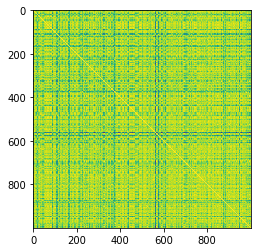

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(S)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/spotify/input/all_tracks.csv')

In [23]:
df.head()

,Unnamed: 0,track_id,track_name,track_url,available_markets,disc_number,duration_ms,popularity,preview_url,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature,artist_id,artist_name,artist_url,artist_type,album_url,album_id,album_name,album_image_url,release_date,total_tracks,genre
0,0,18kopBY404pwnBMYoUwQYi,白日,https://open.spotify.com/track/18kopBY404pwnBM...,JP,1,274912,74,https://p.scdn.co/mp3-preview/ea4b717ce07ca1f7...,1,0.67000,0.606,0.901,0.0,0.2890,-2.552,0.748,0.1100,1,1,93.012,4,6wxfx1yhyqjCPYwwxJktR2,King Gnu,https://open.spotify.com/artist/6wxfx1yhyqjCPY...,artist,https://open.spotify.com/album/3cl7Jz2Ul0f2tBI...,3cl7Jz2Ul0f2tBIwtxRtEG,白日,https://i.scdn.co/image/ab67616d0000b27334547f...,2019-02-22,1,j-pop
1,1,58dxGXavrcagRqA58fNB0Z,Pretender,https://open.spotify.com/track/58dxGXavrcagRqA...,JP,1,326842,73,https://p.scdn.co/mp3-preview/be38b0e8369611ca...,7,0.04700,0.538,0.869,0.0,0.1400,-3.464,0.369,0.0275,8,1,91.972,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/2vwgYzudvFwyFe1...,2vwgYzudvFwyFe1Ho9gdUQ,Traveler,https://i.scdn.co/image/d840bba5b8b0528f5277d1...,2019-09-11,7,j-pop
2,2,2cKiHG16JBiqHdi7Llq0r7,マリーゴールド,https://open.spotify.com/track/2cKiHG16JBiqHdi...,JP,1,306626,70,https://p.scdn.co/mp3-preview/3e7e7b371ffc326a...,2,0.04520,0.545,0.745,0.0,0.0907,-3.098,0.413,0.0286,2,1,106.094,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/7fIqmc4GIaueaiA...,7fIqmc4GIaueaiAoDifAaA,瞬間的シックスセンス,https://i.scdn.co/image/ab67616d0000b273c12d78...,2019-02-13,12,j-pop
3,3,5DMEvbg3gUmiR5HIBWdveV,ノーダウト,https://open.spotify.com/track/5DMEvbg3gUmiR5H...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,202394,72,https://p.scdn.co/mp3-preview/b3409baf6c3f0023...,2,0.05850,0.574,0.936,0.0,0.3360,-3.185,0.793,0.0700,2,1,149.953,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/0Iz8ByVqKvdlyl7...,0Iz8ByVqKvdlyl77DV3y3p,エスカパレード,https://i.scdn.co/image/ab67616d0000b273b483b5...,2018-04-11,13,j-pop
4,4,278JqkBGkjDovOYAwE8TW7,115万キロのフィルム,https://open.spotify.com/track/278JqkBGkjDovOY...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,324633,71,https://p.scdn.co/mp3-preview/40f3707f230ab26e...,1,0.00345,0.514,0.791,0.0,0.1410,-1.927,0.482,0.0318,3,1,96.966,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/0Iz8ByVqKvdlyl7...,0Iz8ByVqKvdlyl77DV3y3p,エスカパレード,https://i.scdn.co/image/ab67616d0000b273b483b5...,2018-04-11,13,j-pop


In [0]:
df = df.sort_values(by=['track_id'])

In [27]:
df.tail(20)

,Unnamed: 0,track_id,track_name,track_url,available_markets,disc_number,duration_ms,popularity,preview_url,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature,artist_id,artist_name,artist_url,artist_type,album_url,album_id,album_name,album_image_url,release_date,total_tracks,genre
626,626,7sLDPa73SleZYAFAKAGhvU,サウダージ,https://open.spotify.com/track/7sLDPa73SleZYAF...,JP,1,260533,49,https://p.scdn.co/mp3-preview/3df6c8a96e5bd6b8...,1,0.135000,0.612,0.978,0.000000,0.3820,-3.292,0.6470,0.0540,4,0,120.041,4,5jQa0f5MIMPEK7udL7UpI6,PornoGraffitti,https://open.spotify.com/artist/5jQa0f5MIMPEK7...,artist,https://open.spotify.com/album/6l1Dn2H2UZFCpu6...,6l1Dn2H2UZFCpu6ePFCrtW,サウダージ,https://i.scdn.co/image/ab67616d0000b273c2967d...,2000-09-13,4,j-pop
995,995,7sXEjgKp9aYqMOQnrGH8B6,お互い様やん,https://open.spotify.com/track/7sXEjgKp9aYqMOQ...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,181186,46,https://p.scdn.co/mp3-preview/7ec58499583e64c0...,3,0.624000,0.707,0.333,0.000060,0.0694,-6.832,0.6660,0.0286,2,1,112.982,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/2QDPEpzxtuvLuE2...,2QDPEpzxtuvLuE21DtGTBh,tamago,https://i.scdn.co/image/ab67616d0000b2731d1704...,2015-08-05,8,j-pop
157,157,7sqoUXFIrcdyDtTjdekx8P,ラストソング,https://open.spotify.com/track/7sqoUXFIrcdyDtT...,JP,1,353371,58,https://p.scdn.co/mp3-preview/2cfe31b569737926...,13,0.024400,0.581,0.773,0.000000,0.0666,-6.344,0.4970,0.0277,5,1,90.020,4,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,https://open.spotify.com/artist/5Vo1hnCRmCM6M4...,artist,https://open.spotify.com/album/0AcDdZ01F1DSv6X...,0AcDdZ01F1DSv6XSvLunkb,Traveler,https://i.scdn.co/image/d840bba5b8b0528f5277d1...,2019-10-09,14,j-pop
889,889,7tBPxHhEhG7jqw37d6Epmu,好きって言ってよ,https://open.spotify.com/track/7tBPxHhEhG7jqw3...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,223533,47,https://p.scdn.co/mp3-preview/b0e1603bbc31527c...,3,0.621000,0.242,0.416,0.000000,0.0974,-5.827,0.2990,0.0300,0,1,186.083,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/6qkgONFlIASOpkZ...,6qkgONFlIASOpkZinBbCAY,憎まれっ子世に憚る,https://i.scdn.co/image/ab67616d0000b273a927ea...,2015-12-02,7,j-pop
25,25,7tGDXCPLpAScEwmqab9YZd,Walking with you,https://open.spotify.com/track/7tGDXCPLpAScEwm...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,223186,67,https://p.scdn.co/mp3-preview/3e6b3753d9b4d9ec...,1,0.005850,0.422,0.969,0.000000,0.5330,-0.824,0.4960,0.0591,7,1,92.524,4,0jWCX6zp4RjWrmZRxJ2uri,Novelbright,https://open.spotify.com/artist/0jWCX6zp4RjWrm...,artist,https://open.spotify.com/album/34T4K8s8PzTNOZ1...,34T4K8s8PzTNOZ1vuBILYr,SKYWALK,https://i.scdn.co/image/ab67616d0000b273e984d2...,2018-10-03,7,j-pop
705,705,7uqJ3N5wiISiyzkQMMCeMR,グッドバイ,https://open.spotify.com/track/7uqJ3N5wiISiyzk...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",2,283000,45,https://p.scdn.co/mp3-preview/92ef315c5855c405...,1,0.103000,0.468,0.559,0.000108,0.4510,-4.936,0.3740,0.0267,5,1,76.001,4,0hCWVMGGQnRVfDgmhwLIxq,Sakanaction,https://open.spotify.com/artist/0hCWVMGGQnRVfD...,artist,https://open.spotify.com/album/5pLmzFu2ienSbr1...,5pLmzFu2ienSbr1SxBJvwB,834.194,https://i.scdn.co/image/ab67616d0000b2733bffc3...,2019-06-19,18,j-pop
487,487,7uwCGnKy5V2Gg5nQe07BtD,My landscape,https://open.spotify.com/track/7uwCGnKy5V2Gg5n...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,334266,52,https://p.scdn.co/mp3-preview/3809fad0154e17f1...,1,0.000037,0.475,0.732,0.000001,0.0738,-5.570,0.1470,0.0330,8,1,131.988,4,0ebinq3ZTOQAJNag4sBTJj,BiSH,https://open.spotify.com/artist/0ebinq3ZTOQAJN...,artist,https://open.spotify.com/album/4C3QGfTeUy9P579...,4C3QGfTeUy9P579s2rFxpj,THE GUERRiLLA BiSH,https://i.scdn.co/image/ab67616d0000b27342f80e...,2017-11-29,13,j-pop
347,347,7vBt0nLQ1uPurkqiW7Pibs,夏のどこかへ,https://open.spotify.com/track/7vBt0nLQ1uPurkq...,"

In [43]:
list(df.reset_index().query('track_id == "6ODZT1FGTE2q4two05giS1"').index)

[793]

In [0]:
df_sim = pd.DataFrame(S)

In [45]:
df_sim.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.974714,0.846568,0.965272,0.982292,0.987167,0.960241,0.906665,0.911928,0.953567,0.966675,0.954344,0.895141,0.930313,0.951836,0.976636,0.950069,0.896682,0.923425,0.945579,0.849333,0.962286,0.956118,0.946582,0.980457,0.932922,0.886631,0.981404,0.937624,0.980037,0.978712,0.964525,0.952586,0.957950,0.916754,0.920377,0.898257,0.947000,0.946891,0.948755,...,0.969821,0.979784,0.931973,0.944143,0.940083,0.940788,0.941081,0.978088,0.932808,0.896633,0.967620,0.972341,0.850257,0.937700,0.948918,0.856715,0.970273,0.839328,0.976529,0.899797,0.976384,0.974802,0.980386,0.960210,0.943030,0.946597,0.971669,0.981807,0.929464,0.910410,0.971135,0.947615,0.981605,0.952838,0.962383,0.849043,0.966768,0.950535,0.902660,0.819753
1,0.974714,1.000000,0.813166,0.978019,0.988304,0.974711,0.939554,0.908006,0.920455,0.913430,0.988228,0.967943,0.858993,0.878693,0.964486,0.961423,0.929801,0.898673,0.876432,0.903727,0.785543,0.923462,0.942029,0.953503,0.985799,0.929770,0.869296,0.960789,0.930180,0.977961,0.946489,0.967190,0.948652,0.941085,0.911044,0.928583,0.913680,0.948918,0.924779,0.950054,...,0.983744,0.976464,0.921952,0.936786,0.954837,0.929514,0.942360,0.966358,0.912566,0.862937,0.951639,0.977568,0.791450,0.918162,0.953105,0.809888,0.967255,0.833505,0.984114,0.891034,0.983894,0.963541,0.991679,0.957779,0.937671,0.972889,0.955521,0.995686,0.931571,0.888522,0.984182,0.974784,0.985776,0.979668,0.960035,0.808637,0.925386,0.962569,0.831571,0.771873
2,0.846568,0.813166,1.000000,0.875125,0.829485,0.855537,0.932210,0.929492,0.844749,0.808690,0.789264,0.868720,0.986126,0.896772,0.844825,0.869672,0.785945,0.946748,0.932618,0.916572,0.938888,0.870395,0.846368,0.881875,0.827070,0.854834,0.901163,0.871242,0.883421,0.869871,0.870013,0.903517,0.919192,0.909375,0.916327,0.881868,0.830422,0.907348,0.929379,0.904182,...,0.816350,0.869637,0.945815,0.937857,0.873068,0.894780,0.907765,0.910847,0.866559,0.979082,0.890642,0.864022,0.960804,0.959701,0.847266,0.931515,0.811378,0.962741,0.839769,0.883145,0.844014,0.865387,0.824780,0.827142,0.856780,0.811017,0.875924,0.815089,0.844479,0.819190,0.823516,0.821888,0.819979,0.750719,0.897219,0.985821,0.783827,0.783615,0.938361,0.979221
3,0.965272,0.978019,0.875125,1.000000,0.981207,0.975862,0.960685,0.931885,0.913507,0.894334,0.978256,0.956155,0.904579,0.883761,0.968103,0.958573,0.891609,0.939856,0.908509,0.938775,0.836033,0.915390,0.915196,0.975189,0.974728,0.901619,0.874960,0.961534,0.951414,0.971560,0.952269,0.963814,0.958626,0.938385,0.943713,0.944900,0.883791,0.962880,0.939802,0.982776,...,0.971499,0.979149,0.938131,0.951378,0.953461,0.932015,0.949546,0.983205,0.906059,0.901094,0.972020,0.978173,0.855648,0.962262,0.943759,0.827499,0.945754,0.896488,0.984059,0.875724,0.984793,0.959154,0.977132,0.937842,0.942257,0.961811,0.969144,0.983743,0.914703,0.856536,0.972216,0.966983,0.972775,0.959829,0.962806,0.859103,0.901327,0.923874,0.872185,0.833983
4,0.982292,0.988304,0.829485,0.981207,1.000000,0.992548,0.957414,0.895451,0.906723,0.923906,0.990481,0.968731,0.875879,0.906365,0.961731,0.984701,0.949591,0.889516,0.913597,0.919513,0.810461,0.946802,0.938620,0.956547,0.989491,0.938494,0.852835,0.979740,0.924383,0.989930,0.953220,0.962141,0.945234,0.930739,0.896864,0.908808,0.885245,0.938905,0.926810,0.949620,...,0.988669,0.975023,0.918181,0.934597,0.935769,0.918070,0.931522,0.973899,0.909484,0.877374,0.954507,0.973481,0.816507,0.929458,0.937149,0.815408,0.979241,0.823850,0.994677,0.873117,0.994271,0.985272,0.987643,0.969796,0.922122,0.959469,0.973682,0.993557,0.918218,0.868438,0.980134,0.963462,0.993759,0.983502,0.958988,0.819997,0.953029,0.945123,0.860638,0.792468


In [60]:
df_sim.iloc[793,:].sort_values(ascending=False).head(6)

793    1.000000
574    0.999747
254    0.993724
880    0.992219
850    0.990967
431    0.990210
Name: 793, dtype: float64

In [77]:
df.iloc[574,:]

Unnamed: 0                                                         846
track_id                                        4a48lWUd64bZgHUDx0GZlj
track_name                                                         新宝島
track_url            https://open.spotify.com/track/4a48lWUd64bZgHU...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     305000
popularity                                                          52
preview_url          https://p.scdn.co/mp3-preview/1ffb1bb16fd3f875...
track_number                                                         5
acousticness                                                    0.0013
danceability                                                     0.551
energy                                                           0.919
instrumentalness                                               0.00638
livene

In [78]:
df.iloc[254,:]

Unnamed: 0                                                         556
track_id                                        1v9EovC0CD8tKq88ZEI3Ri
track_name                                                  Everything
track_url            https://open.spotify.com/track/1v9EovC0CD8tKq8...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     240972
popularity                                                          50
preview_url          https://p.scdn.co/mp3-preview/a716dfe04da917b6...
track_number                                                         1
acousticness                                                     0.413
danceability                                                     0.645
energy                                                           0.892
instrumentalness                                                     0
livene

In [79]:
df.iloc[880,:]

Unnamed: 0                                                         677
track_id                                        71vDsonFaYcVNPqJFBHiVJ
track_name                                                 ロングホープ・フィリア
track_url            https://open.spotify.com/track/71vDsonFaYcVNPq...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     295800
popularity                                                          52
preview_url          https://p.scdn.co/mp3-preview/4bdd89de3a107078...
track_number                                                         3
acousticness                                                    0.0202
danceability                                                     0.591
energy                                                           0.962
instrumentalness                                                     0
livene

In [80]:
df.iloc[850,:]

Unnamed: 0                                                         171
track_id                                        6rEReeuYDZdggaSMF1sybO
track_name                                                       ドラえもん
track_url            https://open.spotify.com/track/6rEReeuYDZdggaS...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     239933
popularity                                                          56
preview_url          https://p.scdn.co/mp3-preview/c3bd47814215483d...
track_number                                                         1
acousticness                                                   0.00676
danceability                                                      0.64
energy                                                           0.547
instrumentalness                                              4.95e-05
livene

In [81]:
df.iloc[431,:]

Unnamed: 0                                                          11
track_id                                        3S3DDZrPOYTirleXRyHnNM
track_name                                                      イエスタデイ
track_url            https://open.spotify.com/track/3S3DDZrPOYTirle...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     299164
popularity                                                          69
preview_url          https://p.scdn.co/mp3-preview/9f78871f94336fc4...
track_number                                                         1
acousticness                                                    0.0442
danceability                                                     0.541
energy                                                             0.8
instrumentalness                                                     0
livene

In [65]:
list(df.reset_index().query('track_id == "2OCtw3vaD0urZuYOeuNw4V"').index)


[316]

In [66]:
df_sim.iloc[316,:].sort_values(ascending=False).head(6)

316    1.000000
10     0.996718
654    0.995393
370    0.993561
665    0.993499
987    0.993400
Name: 316, dtype: float64

In [82]:
df.iloc[10,:]

Unnamed: 0                                                         389
track_id                                        06BIna6ik1U4hoR0XlSfzw
track_name                                                   輝きだして走ってく
track_url            https://open.spotify.com/track/06BIna6ik1U4hoR...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     269466
popularity                                                          46
preview_url          https://p.scdn.co/mp3-preview/6d7c0a54cb14c863...
track_number                                                         1
acousticness                                                    0.0051
danceability                                                     0.444
energy                                                           0.833
instrumentalness                                                     0
livene

In [83]:
df.iloc[654,:]

Unnamed: 0                                                         906
track_id                                        5DtsD7m3yQAD4KyrsjzHA1
track_name                                                         エソラ
track_url            https://open.spotify.com/track/5DtsD7m3yQAD4Ky...
available_markets                                                JP,TW
disc_number                                                          1
duration_ms                                                     304213
popularity                                                          44
preview_url          https://p.scdn.co/mp3-preview/482a805d7cbbbce6...
track_number                                                         3
acousticness                                                   0.00643
danceability                                                     0.547
energy                                                           0.899
instrumentalness                                              2.45e-05
livene

In [84]:
df.iloc[370,:]

Unnamed: 0                                                         457
track_id                                        2pI6Avig0HNZGsZ777MKXM
track_name                                              innocent world
track_url            https://open.spotify.com/track/2pI6Avig0HNZGsZ...
available_markets                                                JP,TW
disc_number                                                          1
duration_ms                                                     345266
popularity                                                          50
preview_url          https://p.scdn.co/mp3-preview/408ae62951353172...
track_number                                                         1
acousticness                                                     0.316
danceability                                                      0.62
energy                                                            0.55
instrumentalness                                                     0
livene

In [85]:
df.iloc[665,:]

Unnamed: 0                                                         598
track_id                                        5IwRgi599tbwNi9wqPYyIX
track_name                                                     Jupiter
track_url            https://open.spotify.com/track/5IwRgi599tbwNi9...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     361000
popularity                                                          52
preview_url          https://p.scdn.co/mp3-preview/0485b31aad8a770f...
track_number                                                        13
acousticness                                                      0.42
danceability                                                     0.333
energy                                                           0.577
instrumentalness                                                     0
livene

In [86]:
df.iloc[987,:]

Unnamed: 0                                                         347
track_id                                        7vBt0nLQ1uPurkqiW7Pibs
track_name                                                      夏のどこかへ
track_url            https://open.spotify.com/track/7vBt0nLQ1uPurkq...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     238917
popularity                                                          54
preview_url          https://p.scdn.co/mp3-preview/e50777aeef75d860...
track_number                                                         2
acousticness                                                   0.00174
danceability                                                     0.549
energy                                                           0.939
instrumentalness                                                     0
livene

# Calculate Euclidian Distance

In [0]:
def d_euc(v1, v2):
    return np.sum((v1- v2)**2) 

In [0]:
import pickle
with open('drive/My Drive/Colab Notebooks/spotify/input/singing_voice_mfcc.pickle', mode='rb') as f:
  M = pickle.load(f)

In [0]:
D = np.zeros([1000,1000])
for i in range(D.shape[0]):
  for j in range(D.shape[1]):
    if j >= i:
      D[i][j] = d_euc(M[i,:], M[j,:])
    else:
      D[i][j] = D[j][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([[    0.        ,  4716.50826854, 24730.76293031, ...,
         8086.44082635, 17297.34056063, 28158.71336262],
       [ 4716.50826854,     0.        , 22676.31959468, ...,
         5401.28344083, 20656.86671278, 27162.90953403],
       [24730.76293031, 22676.31959468,     0.        , ...,
        28351.8049503 ,  5768.01316721,  1865.56959215],
       ...,
       [ 8086.44082635,  5401.28344083, 28351.8049503 , ...,
            0.        , 25016.02062101, 33478.04626617],
       [17297.34056063, 20656.86671278,  5768.01316721, ...,
        25016.02062101,     0.        ,  4583.30781094],
       [28158.71336262, 27162.90953403,  1865.56959215, ...,
        33478.04626617,  4583.30781094,     0.        ]])

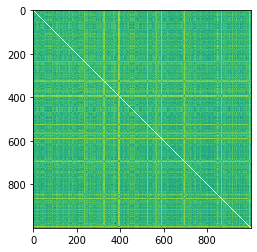

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.log(D))
D

In [0]:
import pandas as pd
df_sim = pd.DataFrame(D)

In [19]:
df_sim.iloc[793,:].sort_values(ascending=True).head(7)

793       0.000000
574      76.390333
431    1974.462615
632    1974.462615
850    2119.892349
967    2306.592206
876    2311.200046
Name: 793, dtype: float64

In [26]:
df.iloc[967,:]

Unnamed: 0                                                         899
track_id                                        7nj9JW6QQrholNi2R2lffN
track_name                                                       準透明少年
track_url            https://open.spotify.com/track/7nj9JW6QQrholNi...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     281467
popularity                                                          49
preview_url          https://p.scdn.co/mp3-preview/3f9ebb3208ed92ea...
track_number                                                         6
acousticness                                                    0.0263
danceability                                                     0.561
energy                                                           0.923
instrumentalness                                                     0
livene

In [27]:
df.iloc[876,:]

Unnamed: 0                                                         496
track_id                                        70deSMfvYqELhxcTnOlvuW
track_name                                                       オドループ
track_url            https://open.spotify.com/track/70deSMfvYqELhxc...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     255293
popularity                                                          45
preview_url          https://p.scdn.co/mp3-preview/124ba179bf261d54...
track_number                                                         1
acousticness                                                    0.0034
danceability                                                     0.424
energy                                                           0.899
instrumentalness                                               8.1e-05
livene

In [28]:
df_sim.iloc[316,:].sort_values(ascending=True).head(7)

316       0.000000
566    2512.784666
846    2524.701066
289    2589.886513
604    3184.864334
10     3556.416044
370    4027.544543
Name: 316, dtype: float64

In [29]:
df.iloc[566,:]

Unnamed: 0                                                         245
track_id                                        4XkqVSWIPb07iLEDvAPq93
track_name                                                    やさしくなりたい
track_url            https://open.spotify.com/track/4XkqVSWIPb07iLE...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     316106
popularity                                                          54
preview_url          https://p.scdn.co/mp3-preview/34510be551b4c1b1...
track_number                                                         1
acousticness                                                   0.00877
danceability                                                     0.496
energy                                                           0.915
instrumentalness                                               0.00189
livene

In [30]:
df.iloc[846,:]

Unnamed: 0                                                         999
track_id                                        6mmHwsfy9QU42LeV6c9UT7
track_name                                                        さすらい
track_url            https://open.spotify.com/track/6mmHwsfy9QU42Le...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     203160
popularity                                                          45
preview_url          https://p.scdn.co/mp3-preview/9eb5f50499556e45...
track_number                                                        10
acousticness                                                    0.0126
danceability                                                     0.591
energy                                                           0.792
instrumentalness                                              1.52e-05
livene

In [31]:
df.iloc[289,:]

Unnamed: 0                                                         640
track_id                                        2A0t0Cgbb6PA5JJqBXRMgJ
track_name                                                    やさしくなりたい
track_url            https://open.spotify.com/track/2A0t0Cgbb6PA5JJ...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     315900
popularity                                                          45
preview_url          https://p.scdn.co/mp3-preview/17e85ba3a6187457...
track_number                                                         1
acousticness                                                   0.00795
danceability                                                     0.495
energy                                                            0.91
instrumentalness                                               0.00123
livene

In [32]:
df.iloc[604,:]

Unnamed: 0                                                         320
track_id                                        4nYrT4h72JvsNh3t80FmG0
track_name                                                      悲しみの果て
track_url            https://open.spotify.com/track/4nYrT4h72JvsNh3...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     154173
popularity                                                          46
preview_url          https://p.scdn.co/mp3-preview/5060938595af150c...
track_number                                                         2
acousticness                                                   0.00544
danceability                                                     0.441
energy                                                           0.486
instrumentalness                                              6.17e-06
livene

In [33]:
df.iloc[10,:]

Unnamed: 0                                                         389
track_id                                        06BIna6ik1U4hoR0XlSfzw
track_name                                                   輝きだして走ってく
track_url            https://open.spotify.com/track/06BIna6ik1U4hoR...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     269466
popularity                                                          46
preview_url          https://p.scdn.co/mp3-preview/6d7c0a54cb14c863...
track_number                                                         1
acousticness                                                    0.0051
danceability                                                     0.444
energy                                                           0.833
instrumentalness                                                     0
livene

In [34]:
df.iloc[370,:]

Unnamed: 0                                                         457
track_id                                        2pI6Avig0HNZGsZ777MKXM
track_name                                              innocent world
track_url            https://open.spotify.com/track/2pI6Avig0HNZGsZ...
available_markets                                                JP,TW
disc_number                                                          1
duration_ms                                                     345266
popularity                                                          50
preview_url          https://p.scdn.co/mp3-preview/408ae62951353172...
track_number                                                         1
acousticness                                                     0.316
danceability                                                      0.62
energy                                                            0.55
instrumentalness                                                     0
livene

# Calculate Similarity with a Recorded Voice

In [11]:
filename='drive/My Drive/Colab Notebooks/spotify/input/masuda_voice.m4a'
print(filename)
try:
  y, sr = librosa.core.load(filename, sr=sr, mono=False,offset=0.0,
                          duration=None, res_type='kaiser_best')
except:
  print(filename + "has loading error!")
  y = np.zeros([2,48000])
print(y.shape)
mfcc = librosa.feature.mfcc(y, sr=sr, S=None, n_mfcc=n_mfcc, dct_type=2, norm='ortho')
mfcc_median = np.median(mfcc, axis=1)
assert mfcc_median.shape == (n_mfcc,)
mfcc_median = np.reshape(mfcc_median, [20,1])
print(mfcc_median.shape)
assert mfcc_median.shape == (n_mfcc,1)

drive/My Drive/Colab Notebooks/spotify/input/masuda_voice.m4a
(164160,)
(20, 1)


In [0]:
D = np.zeros(1000)
for i in range(D.shape[0]):
      D[i] = d_euc(M[i,:], mfcc_median)

In [20]:
df_dist = pd.DataFrame(D)
df_dist.head()

,0
0,3.075568e+06
1,2.760724e+06
2,2.309146e+06
3,4.083389e+06
4,2.910779e+06


In [23]:
df_dist.sort_values(ascending=True, by=0).head(7)

,0
505,1.763775e+06
735,1.821473e+06
294,1.827227e+06
167,1.883103e+06
519,1.883903e+06
45,1.895685e+06
464,1.907640e+06


In [28]:
df.iloc[505,:]

Unnamed: 0                                                         505
track_id                                        3z6X1pQSGdky5rQADTLM2g
track_name                                                  合法的トビ方ノススメ
track_url            https://open.spotify.com/track/3z6X1pQSGdky5rQ...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     240328
popularity                                                          50
preview_url          https://p.scdn.co/mp3-preview/8aa908e966387933...
track_number                                                         2
acousticness                                                     0.791
danceability                                                     0.737
energy                                                           0.971
instrumentalness                                                     0
livene

In [29]:
df.iloc[735,:]

Unnamed: 0                                                          75
track_id                                        5qqWTGgelCt5gqAfvkj6gG
track_name                                                 Rat-tat-tat
track_url            https://open.spotify.com/track/5qqWTGgelCt5gqA...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     150500
popularity                                                          59
preview_url          https://p.scdn.co/mp3-preview/086e0f0f9660afd8...
track_number                                                         1
acousticness                                                    0.0517
danceability                                                     0.582
energy                                                           0.944
instrumentalness                                                     0
livene

In [31]:
df['artist_id'].nunique()

181

In [32]:
df.iloc[294,:]

Unnamed: 0                                                         416
track_id                                        2BM4k1nxxuR1hmxoOB4d9x
track_name                                                          告白
track_url            https://open.spotify.com/track/2BM4k1nxxuR1hmx...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     281400
popularity                                                          51
preview_url          https://p.scdn.co/mp3-preview/2ffdc29b84b9a543...
track_number                                                         6
acousticness                                                     0.105
danceability                                                     0.479
energy                                                           0.877
instrumentalness                                                     0
livene

In [33]:
df.iloc[167,:]

Unnamed: 0                                                         173
track_id                                        1JwTpIQeQqcqIBAgwottNU
track_name                                                Who Are You?
track_url            https://open.spotify.com/track/1JwTpIQeQqcqIBA...
available_markets    AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...
disc_number                                                          1
duration_ms                                                     235732
popularity                                                          44
preview_url          https://p.scdn.co/mp3-preview/0c50cda5bc681849...
track_number                                                         1
acousticness                                                     0.135
danceability                                                     0.565
energy                                                           0.855
instrumentalness                                                     0
livene

In [34]:
df.iloc[519,:]

Unnamed: 0                                                         646
track_id                                        47VbfluMsR8PyYpIDCeiMb
track_name                                                PORSCHEでKISS
track_url            https://open.spotify.com/track/47VbfluMsR8PyYp...
available_markets                                                   JP
disc_number                                                          1
duration_ms                                                     198900
popularity                                                          50
preview_url          https://p.scdn.co/mp3-preview/bac7d029eeb6bb11...
track_number                                                         1
acousticness                                                    0.0126
danceability                                                     0.729
energy                                                           0.646
instrumentalness                                              2.24e-06
livene